<img src="../images/headers/nb_4.svg"  width="1080" height="220">

The objective of this notebook is to apply artificial neural network models to the
tabular data used in notebook 3.

First, a simple dense nn will be trained. The task will be treated as classification.
This means, that the model will ignore that we have ordered categories.
Second, a dense nn will be trained using an ordinal layer, an ordinal loss function and
ordinal metrics provided by the coral_ordinal package.

The models will be compared with regard to their accuracy.


# Import Packages and Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import coral_ordinal as coral
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from roaf import visualization

In [2]:
plt.style.use("dark_background")
plt.set_cmap("Dark2")
sns.set_palette("Dark2")

<Figure size 640x480 with 0 Axes>

In [3]:
FAST_EXECUTION = False
N_EPOCHS = 20

In [4]:
TRAIN_FILENAME = "Xy_train"
TEST_FILENAME = "Xy_test"

if FAST_EXECUTION:
    TRAIN_FILENAME = "TESTING_" + TRAIN_FILENAME
    TEST_FILENAME = "TESTING_" + TEST_FILENAME

train = pd.read_parquet("../data/processed/" + TRAIN_FILENAME + ".parquet")
test = pd.read_parquet("../data/processed/" + TEST_FILENAME + ".parquet")

In [5]:
X_train = train.drop(columns="severity")
y_train = train["severity"]
X_test = test.drop(columns="severity")
y_test = test["severity"]

# ANN Models with Keras

In [6]:
models_df = pd.DataFrame(  # pylint: disable=C0103
    columns=["model", "history", "i_color", "metric"]
).rename_axis(index="model_name")

## Simple Dense Layer Network Classifier

In [7]:
MODEL_ID = "ann"
DROPOUT_RATE = 0.3
models_df.loc[MODEL_ID, "model"] = keras.Sequential(
    [
        keras.layers.Dense(
            units=32, activation="gelu", input_shape=(X_train.shape[1],)
        ),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        keras.layers.Dense(units=3, activation="softmax"),
    ],
    name="Dense_ANN",
)

# get index fo
models_df.loc[MODEL_ID, "model"].compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", coral.MeanAbsoluteErrorLabels()],
)

reduce_lr_callback = keras.callbacks.ReduceLROnPlateau(
    factor=0.75, patience=6, cooldown=10, min_lr=0.0001
)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)
callbacks = [reduce_lr_callback, early_stopping]

In [8]:
models_df.loc[MODEL_ID, "history"] = models_df.loc[MODEL_ID, "model"].fit(
    X_train, y_train, epochs=N_EPOCHS, validation_split=0.1, callbacks=callbacks
)

Epoch 1/20


  1/641 [..............................] - ETA: 12:22 - loss: 1.2338 - accuracy: 0.3750 - mean_absolute_error_labels: 2.0625

 24/641 [>.............................] - ETA: 1s - loss: 1.2523 - accuracy: 0.3776 - mean_absolute_error_labels: 1.9974   

 49/641 [=>............................] - ETA: 1s - loss: 1.2509 - accuracy: 0.4018 - mean_absolute_error_labels: 2.0083

 73/641 [==>...........................] - ETA: 1s - loss: 1.2206 - accuracy: 0.4204 - mean_absolute_error_labels: 2.0240

 98/641 [===>..........................] - ETA: 1s - loss: 1.1817 - accuracy: 0.4416 - mean_absolute_error_labels: 2.0188

123/641 [====>.........................] - ETA: 1s - loss: 1.1384 - accuracy: 0.4642 - mean_absolute_error_labels: 2.0272

148/641 [=====>........................] - ETA: 1s - loss: 1.1290 - accuracy: 0.4766 - mean_absolute_error_labels: 2.0236

171/641 [=======>......................] - ETA: 0s - loss: 1.1145 - accuracy: 0.4874 - mean_absolute_error_labels: 2.0177

191/641 [=======>......................] - ETA: 0s - loss: 1.0967 - accuracy: 0.4975 - mean_absolute_error_labels: 2.0116

211/641 [========>.....................] - ETA: 0s - loss: 1.0812 - accuracy: 0.5087 - mean_absolute_error_labels: 2.0124

236/641 [==========>...................] - ETA: 0s - loss: 1.0666 - accuracy: 0.5155 - mean_absolute_error_labels: 2.0113

261/641 [===========>..................] - ETA: 0s - loss: 1.0509 - accuracy: 0.5216 - mean_absolute_error_labels: 2.0107

288/641 [============>.................] - ETA: 0s - loss: 1.0413 - accuracy: 0.5276 - mean_absolute_error_labels: 2.0112

315/641 [=============>................] - ETA: 0s - loss: 1.0302 - accuracy: 0.5329 - mean_absolute_error_labels: 2.0152

340/641 [==============>...............] - ETA: 0s - loss: 1.0214 - accuracy: 0.5373 - mean_absolute_error_labels: 2.0108

366/641 [================>.............] - ETA: 0s - loss: 1.0124 - accuracy: 0.5422 - mean_absolute_error_labels: 2.0071

391/641 [=================>............] - ETA: 0s - loss: 1.0021 - accuracy: 0.5484 - mean_absolute_error_labels: 2.0065

418/641 [==================>...........] - ETA: 0s - loss: 0.9957 - accuracy: 0.5512 - mean_absolute_error_labels: 2.0081

441/641 [===================>..........] - ETA: 0s - loss: 0.9899 - accuracy: 0.5534 - mean_absolute_error_labels: 2.0073

458/641 [====================>.........] - ETA: 0s - loss: 0.9851 - accuracy: 0.5560 - mean_absolute_error_labels: 2.0081

477/641 [=====================>........] - ETA: 0s - loss: 0.9828 - accuracy: 0.5572 - mean_absolute_error_labels: 2.0076

498/641 [======================>.......] - ETA: 0s - loss: 0.9789 - accuracy: 0.5598 - mean_absolute_error_labels: 2.0073

519/641 [=======================>......] - ETA: 0s - loss: 0.9730 - accuracy: 0.5624 - mean_absolute_error_labels: 2.0076

538/641 [========================>.....] - ETA: 0s - loss: 0.9700 - accuracy: 0.5628 - mean_absolute_error_labels: 2.0081

561/641 [=========================>....] - ETA: 0s - loss: 0.9643 - accuracy: 0.5641 - mean_absolute_error_labels: 2.0067

585/641 [==========================>...] - ETA: 0s - loss: 0.9590 - accuracy: 0.5662 - mean_absolute_error_labels: 2.0036

609/641 [===========================>..] - ETA: 0s - loss: 0.9542 - accuracy: 0.5678 - mean_absolute_error_labels: 2.0039

633/641 [============================>.] - ETA: 0s - loss: 0.9484 - accuracy: 0.5708 - mean_absolute_error_labels: 2.0024

641/641 [==============================] - 3s 3ms/step - loss: 0.9467 - accuracy: 0.5718 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7931 - val_accuracy: 0.6491 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 2/20


  1/641 [..............................] - ETA: 1s - loss: 0.7843 - accuracy: 0.5938 - mean_absolute_error_labels: 1.9062

 24/641 [>.............................] - ETA: 1s - loss: 0.8409 - accuracy: 0.6094 - mean_absolute_error_labels: 1.9727

 49/641 [=>............................] - ETA: 1s - loss: 0.8389 - accuracy: 0.6078 - mean_absolute_error_labels: 2.0089

 74/641 [==>...........................] - ETA: 1s - loss: 0.8353 - accuracy: 0.6094 - mean_absolute_error_labels: 2.0046

 97/641 [===>..........................] - ETA: 1s - loss: 0.8279 - accuracy: 0.6134 - mean_absolute_error_labels: 2.0126

118/641 [====>.........................] - ETA: 1s - loss: 0.8277 - accuracy: 0.6186 - mean_absolute_error_labels: 2.0034

140/641 [=====>........................] - ETA: 1s - loss: 0.8270 - accuracy: 0.6217 - mean_absolute_error_labels: 1.9975

164/641 [======>.......................] - ETA: 1s - loss: 0.8190 - accuracy: 0.6277 - mean_absolute_error_labels: 1.9989

186/641 [=======>......................] - ETA: 1s - loss: 0.8214 - accuracy: 0.6265 - mean_absolute_error_labels: 1.9976

211/641 [========>.....................] - ETA: 0s - loss: 0.8252 - accuracy: 0.6251 - mean_absolute_error_labels: 1.9964

236/641 [==========>...................] - ETA: 0s - loss: 0.8272 - accuracy: 0.6233 - mean_absolute_error_labels: 1.9987

259/641 [===========>..................] - ETA: 0s - loss: 0.8282 - accuracy: 0.6231 - mean_absolute_error_labels: 1.9971

282/641 [============>.................] - ETA: 0s - loss: 0.8243 - accuracy: 0.6263 - mean_absolute_error_labels: 2.0008

307/641 [=============>................] - ETA: 0s - loss: 0.8214 - accuracy: 0.6272 - mean_absolute_error_labels: 1.9966

332/641 [==============>...............] - ETA: 0s - loss: 0.8196 - accuracy: 0.6287 - mean_absolute_error_labels: 1.9971

357/641 [===============>..............] - ETA: 0s - loss: 0.8189 - accuracy: 0.6290 - mean_absolute_error_labels: 1.9919

382/641 [================>.............] - ETA: 0s - loss: 0.8183 - accuracy: 0.6304 - mean_absolute_error_labels: 1.9915

406/641 [==================>...........] - ETA: 0s - loss: 0.8202 - accuracy: 0.6312 - mean_absolute_error_labels: 1.9939

432/641 [===================>..........] - ETA: 0s - loss: 0.8208 - accuracy: 0.6307 - mean_absolute_error_labels: 1.9978

458/641 [====================>.........] - ETA: 0s - loss: 0.8195 - accuracy: 0.6316 - mean_absolute_error_labels: 1.9998

482/641 [=====================>........] - ETA: 0s - loss: 0.8179 - accuracy: 0.6327 - mean_absolute_error_labels: 2.0011

507/641 [======================>.......] - ETA: 0s - loss: 0.8175 - accuracy: 0.6327 - mean_absolute_error_labels: 2.0006

531/641 [=======================>......] - ETA: 0s - loss: 0.8170 - accuracy: 0.6339 - mean_absolute_error_labels: 2.0012

556/641 [=========================>....] - ETA: 0s - loss: 0.8170 - accuracy: 0.6341 - mean_absolute_error_labels: 2.0033

582/641 [==========================>...] - ETA: 0s - loss: 0.8158 - accuracy: 0.6335 - mean_absolute_error_labels: 2.0030

607/641 [===========================>..] - ETA: 0s - loss: 0.8162 - accuracy: 0.6332 - mean_absolute_error_labels: 2.0011

630/641 [============================>.] - ETA: 0s - loss: 0.8161 - accuracy: 0.6341 - mean_absolute_error_labels: 2.0030

641/641 [==============================] - 2s 2ms/step - loss: 0.8161 - accuracy: 0.6345 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7777 - val_accuracy: 0.6478 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 3/20


  1/641 [..............................] - ETA: 1s - loss: 0.9201 - accuracy: 0.5938 - mean_absolute_error_labels: 1.8750

 26/641 [>.............................] - ETA: 1s - loss: 0.7977 - accuracy: 0.6262 - mean_absolute_error_labels: 1.9832

 50/641 [=>............................] - ETA: 1s - loss: 0.8104 - accuracy: 0.6269 - mean_absolute_error_labels: 2.0050

 74/641 [==>...........................] - ETA: 1s - loss: 0.7978 - accuracy: 0.6334 - mean_absolute_error_labels: 2.0046

 99/641 [===>..........................] - ETA: 1s - loss: 0.7917 - accuracy: 0.6332 - mean_absolute_error_labels: 1.9921

124/641 [====>.........................] - ETA: 1s - loss: 0.7922 - accuracy: 0.6371 - mean_absolute_error_labels: 1.9917

146/641 [=====>........................] - ETA: 1s - loss: 0.7911 - accuracy: 0.6391 - mean_absolute_error_labels: 1.9910

169/641 [======>.......................] - ETA: 0s - loss: 0.7925 - accuracy: 0.6415 - mean_absolute_error_labels: 1.9954

192/641 [=======>......................] - ETA: 0s - loss: 0.7918 - accuracy: 0.6419 - mean_absolute_error_labels: 1.9891

214/641 [=========>....................] - ETA: 0s - loss: 0.7940 - accuracy: 0.6428 - mean_absolute_error_labels: 1.9928

237/641 [==========>...................] - ETA: 0s - loss: 0.7895 - accuracy: 0.6453 - mean_absolute_error_labels: 1.9898

258/641 [===========>..................] - ETA: 0s - loss: 0.7942 - accuracy: 0.6424 - mean_absolute_error_labels: 1.9920

281/641 [============>.................] - ETA: 0s - loss: 0.7974 - accuracy: 0.6409 - mean_absolute_error_labels: 1.9940

304/641 [=============>................] - ETA: 0s - loss: 0.7945 - accuracy: 0.6434 - mean_absolute_error_labels: 1.9969

328/641 [==============>...............] - ETA: 0s - loss: 0.7949 - accuracy: 0.6433 - mean_absolute_error_labels: 1.9953

353/641 [===============>..............] - ETA: 0s - loss: 0.7940 - accuracy: 0.6428 - mean_absolute_error_labels: 1.9988

377/641 [================>.............] - ETA: 0s - loss: 0.7912 - accuracy: 0.6441 - mean_absolute_error_labels: 1.9973

402/641 [=================>............] - ETA: 0s - loss: 0.7909 - accuracy: 0.6445 - mean_absolute_error_labels: 1.9956

427/641 [==================>...........] - ETA: 0s - loss: 0.7902 - accuracy: 0.6455 - mean_absolute_error_labels: 1.9975

451/641 [====================>.........] - ETA: 0s - loss: 0.7902 - accuracy: 0.6442 - mean_absolute_error_labels: 1.9985

474/641 [=====================>........] - ETA: 0s - loss: 0.7896 - accuracy: 0.6450 - mean_absolute_error_labels: 1.9998

499/641 [======================>.......] - ETA: 0s - loss: 0.7891 - accuracy: 0.6456 - mean_absolute_error_labels: 2.0001

524/641 [=======================>......] - ETA: 0s - loss: 0.7897 - accuracy: 0.6456 - mean_absolute_error_labels: 2.0011

548/641 [========================>.....] - ETA: 0s - loss: 0.7910 - accuracy: 0.6451 - mean_absolute_error_labels: 2.0010

573/641 [=========================>....] - ETA: 0s - loss: 0.7905 - accuracy: 0.6451 - mean_absolute_error_labels: 2.0023

599/641 [===========================>..] - ETA: 0s - loss: 0.7907 - accuracy: 0.6437 - mean_absolute_error_labels: 2.0027

625/641 [============================>.] - ETA: 0s - loss: 0.7904 - accuracy: 0.6442 - mean_absolute_error_labels: 2.0023

641/641 [==============================] - 2s 2ms/step - loss: 0.7901 - accuracy: 0.6440 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7669 - val_accuracy: 0.6469 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 4/20


  1/641 [..............................] - ETA: 2s - loss: 0.5893 - accuracy: 0.8125 - mean_absolute_error_labels: 1.8438

 26/641 [>.............................] - ETA: 1s - loss: 0.7680 - accuracy: 0.6575 - mean_absolute_error_labels: 2.0264

 49/641 [=>............................] - ETA: 1s - loss: 0.7586 - accuracy: 0.6607 - mean_absolute_error_labels: 2.0115

 72/641 [==>...........................] - ETA: 1s - loss: 0.7680 - accuracy: 0.6554 - mean_absolute_error_labels: 2.0187

 97/641 [===>..........................] - ETA: 1s - loss: 0.7628 - accuracy: 0.6527 - mean_absolute_error_labels: 2.0042

123/641 [====>.........................] - ETA: 1s - loss: 0.7689 - accuracy: 0.6496 - mean_absolute_error_labels: 2.0076

149/641 [=====>........................] - ETA: 1s - loss: 0.7758 - accuracy: 0.6435 - mean_absolute_error_labels: 2.0021

173/641 [=======>......................] - ETA: 0s - loss: 0.7777 - accuracy: 0.6443 - mean_absolute_error_labels: 2.0054

196/641 [========>.....................] - ETA: 0s - loss: 0.7821 - accuracy: 0.6437 - mean_absolute_error_labels: 2.0053

220/641 [=========>....................] - ETA: 0s - loss: 0.7815 - accuracy: 0.6429 - mean_absolute_error_labels: 2.0007

245/641 [==========>...................] - ETA: 0s - loss: 0.7745 - accuracy: 0.6483 - mean_absolute_error_labels: 2.0027

270/641 [===========>..................] - ETA: 0s - loss: 0.7750 - accuracy: 0.6463 - mean_absolute_error_labels: 2.0052

295/641 [============>.................] - ETA: 0s - loss: 0.7740 - accuracy: 0.6480 - mean_absolute_error_labels: 2.0066

318/641 [=============>................] - ETA: 0s - loss: 0.7757 - accuracy: 0.6476 - mean_absolute_error_labels: 2.0020

341/641 [==============>...............] - ETA: 0s - loss: 0.7758 - accuracy: 0.6484 - mean_absolute_error_labels: 2.0044

366/641 [================>.............] - ETA: 0s - loss: 0.7733 - accuracy: 0.6496 - mean_absolute_error_labels: 2.0043

391/641 [=================>............] - ETA: 0s - loss: 0.7755 - accuracy: 0.6479 - mean_absolute_error_labels: 2.0041

415/641 [==================>...........] - ETA: 0s - loss: 0.7775 - accuracy: 0.6471 - mean_absolute_error_labels: 2.0063

440/641 [===================>..........] - ETA: 0s - loss: 0.7793 - accuracy: 0.6463 - mean_absolute_error_labels: 2.0033

466/641 [====================>.........] - ETA: 0s - loss: 0.7800 - accuracy: 0.6464 - mean_absolute_error_labels: 2.0004

490/641 [=====================>........] - ETA: 0s - loss: 0.7806 - accuracy: 0.6449 - mean_absolute_error_labels: 2.0023

515/641 [=======================>......] - ETA: 0s - loss: 0.7820 - accuracy: 0.6439 - mean_absolute_error_labels: 2.0020

540/641 [========================>.....] - ETA: 0s - loss: 0.7809 - accuracy: 0.6450 - mean_absolute_error_labels: 2.0010

565/641 [=========================>....] - ETA: 0s - loss: 0.7809 - accuracy: 0.6452 - mean_absolute_error_labels: 2.0008

590/641 [==========================>...] - ETA: 0s - loss: 0.7794 - accuracy: 0.6462 - mean_absolute_error_labels: 2.0043

615/641 [===========================>..] - ETA: 0s - loss: 0.7796 - accuracy: 0.6464 - mean_absolute_error_labels: 2.0033

640/641 [============================>.] - ETA: 0s - loss: 0.7797 - accuracy: 0.6461 - mean_absolute_error_labels: 2.0028

641/641 [==============================] - 1s 2ms/step - loss: 0.7799 - accuracy: 0.6461 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7620 - val_accuracy: 0.6522 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 5/20


  1/641 [..............................] - ETA: 1s - loss: 0.6744 - accuracy: 0.6875 - mean_absolute_error_labels: 1.9062

 22/641 [>.............................] - ETA: 1s - loss: 0.7461 - accuracy: 0.6832 - mean_absolute_error_labels: 2.0369

 44/641 [=>............................] - ETA: 1s - loss: 0.7710 - accuracy: 0.6591 - mean_absolute_error_labels: 2.0142

 69/641 [==>...........................] - ETA: 1s - loss: 0.7611 - accuracy: 0.6626 - mean_absolute_error_labels: 1.9968

 92/641 [===>..........................] - ETA: 1s - loss: 0.7661 - accuracy: 0.6617 - mean_absolute_error_labels: 2.0037

116/641 [====>.........................] - ETA: 1s - loss: 0.7702 - accuracy: 0.6576 - mean_absolute_error_labels: 1.9916

140/641 [=====>........................] - ETA: 1s - loss: 0.7667 - accuracy: 0.6592 - mean_absolute_error_labels: 1.9984

165/641 [======>.......................] - ETA: 1s - loss: 0.7667 - accuracy: 0.6600 - mean_absolute_error_labels: 1.9956

189/641 [=======>......................] - ETA: 0s - loss: 0.7673 - accuracy: 0.6574 - mean_absolute_error_labels: 1.9936

210/641 [========>.....................] - ETA: 0s - loss: 0.7635 - accuracy: 0.6585 - mean_absolute_error_labels: 1.9967

230/641 [=========>....................] - ETA: 0s - loss: 0.7656 - accuracy: 0.6577 - mean_absolute_error_labels: 1.9992

252/641 [==========>...................] - ETA: 0s - loss: 0.7677 - accuracy: 0.6574 - mean_absolute_error_labels: 2.0011

274/641 [===========>..................] - ETA: 0s - loss: 0.7650 - accuracy: 0.6580 - mean_absolute_error_labels: 1.9985

297/641 [============>.................] - ETA: 0s - loss: 0.7665 - accuracy: 0.6570 - mean_absolute_error_labels: 2.0008

320/641 [=============>................] - ETA: 0s - loss: 0.7660 - accuracy: 0.6573 - mean_absolute_error_labels: 2.0003

343/641 [===============>..............] - ETA: 0s - loss: 0.7680 - accuracy: 0.6566 - mean_absolute_error_labels: 1.9977

368/641 [================>.............] - ETA: 0s - loss: 0.7678 - accuracy: 0.6575 - mean_absolute_error_labels: 1.9993

393/641 [=================>............] - ETA: 0s - loss: 0.7696 - accuracy: 0.6554 - mean_absolute_error_labels: 2.0009

416/641 [==================>...........] - ETA: 0s - loss: 0.7711 - accuracy: 0.6550 - mean_absolute_error_labels: 2.0017

441/641 [===================>..........] - ETA: 0s - loss: 0.7706 - accuracy: 0.6554 - mean_absolute_error_labels: 1.9989

466/641 [====================>.........] - ETA: 0s - loss: 0.7704 - accuracy: 0.6558 - mean_absolute_error_labels: 2.0005

491/641 [=====================>........] - ETA: 0s - loss: 0.7702 - accuracy: 0.6562 - mean_absolute_error_labels: 2.0018

515/641 [=======================>......] - ETA: 0s - loss: 0.7691 - accuracy: 0.6566 - mean_absolute_error_labels: 2.0030

539/641 [========================>.....] - ETA: 0s - loss: 0.7706 - accuracy: 0.6555 - mean_absolute_error_labels: 2.0034

563/641 [=========================>....] - ETA: 0s - loss: 0.7706 - accuracy: 0.6559 - mean_absolute_error_labels: 2.0029

587/641 [==========================>...] - ETA: 0s - loss: 0.7695 - accuracy: 0.6566 - mean_absolute_error_labels: 2.0036

612/641 [===========================>..] - ETA: 0s - loss: 0.7700 - accuracy: 0.6561 - mean_absolute_error_labels: 2.0032

635/641 [============================>.] - ETA: 0s - loss: 0.7695 - accuracy: 0.6567 - mean_absolute_error_labels: 2.0028

641/641 [==============================] - 2s 2ms/step - loss: 0.7699 - accuracy: 0.6565 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7595 - val_accuracy: 0.6605 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 6/20


  1/641 [..............................] - ETA: 2s - loss: 0.7190 - accuracy: 0.7188 - mean_absolute_error_labels: 2.1250

 26/641 [>.............................] - ETA: 1s - loss: 0.7828 - accuracy: 0.6526 - mean_absolute_error_labels: 2.0180

 51/641 [=>............................] - ETA: 1s - loss: 0.7493 - accuracy: 0.6673 - mean_absolute_error_labels: 2.0251

 75/641 [==>...........................] - ETA: 1s - loss: 0.7545 - accuracy: 0.6592 - mean_absolute_error_labels: 2.0133

 98/641 [===>..........................] - ETA: 1s - loss: 0.7495 - accuracy: 0.6607 - mean_absolute_error_labels: 2.0048

121/641 [====>.........................] - ETA: 1s - loss: 0.7575 - accuracy: 0.6578 - mean_absolute_error_labels: 2.0000

144/641 [=====>........................] - ETA: 1s - loss: 0.7567 - accuracy: 0.6602 - mean_absolute_error_labels: 2.0052

164/641 [======>.......................] - ETA: 1s - loss: 0.7543 - accuracy: 0.6637 - mean_absolute_error_labels: 1.9998

188/641 [=======>......................] - ETA: 0s - loss: 0.7541 - accuracy: 0.6616 - mean_absolute_error_labels: 2.0015

213/641 [========>.....................] - ETA: 0s - loss: 0.7562 - accuracy: 0.6608 - mean_absolute_error_labels: 2.0001

238/641 [==========>...................] - ETA: 0s - loss: 0.7566 - accuracy: 0.6605 - mean_absolute_error_labels: 2.0011

263/641 [===========>..................] - ETA: 0s - loss: 0.7552 - accuracy: 0.6612 - mean_absolute_error_labels: 1.9964

287/641 [============>.................] - ETA: 0s - loss: 0.7547 - accuracy: 0.6635 - mean_absolute_error_labels: 1.9991

313/641 [=============>................] - ETA: 0s - loss: 0.7541 - accuracy: 0.6637 - mean_absolute_error_labels: 2.0004

336/641 [==============>...............] - ETA: 0s - loss: 0.7561 - accuracy: 0.6621 - mean_absolute_error_labels: 1.9989

361/641 [===============>..............] - ETA: 0s - loss: 0.7548 - accuracy: 0.6620 - mean_absolute_error_labels: 1.9977

383/641 [================>.............] - ETA: 0s - loss: 0.7570 - accuracy: 0.6619 - mean_absolute_error_labels: 1.9964

407/641 [==================>...........] - ETA: 0s - loss: 0.7578 - accuracy: 0.6620 - mean_absolute_error_labels: 1.9990

432/641 [===================>..........] - ETA: 0s - loss: 0.7581 - accuracy: 0.6626 - mean_absolute_error_labels: 2.0017

456/641 [====================>.........] - ETA: 0s - loss: 0.7570 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0025

480/641 [=====================>........] - ETA: 0s - loss: 0.7568 - accuracy: 0.6641 - mean_absolute_error_labels: 2.0025

505/641 [======================>.......] - ETA: 0s - loss: 0.7580 - accuracy: 0.6631 - mean_absolute_error_labels: 2.0014

530/641 [=======================>......] - ETA: 0s - loss: 0.7591 - accuracy: 0.6625 - mean_absolute_error_labels: 2.0005

555/641 [========================>.....] - ETA: 0s - loss: 0.7602 - accuracy: 0.6622 - mean_absolute_error_labels: 2.0014

580/641 [==========================>...] - ETA: 0s - loss: 0.7605 - accuracy: 0.6616 - mean_absolute_error_labels: 2.0007

606/641 [===========================>..] - ETA: 0s - loss: 0.7605 - accuracy: 0.6620 - mean_absolute_error_labels: 2.0009

631/641 [============================>.] - ETA: 0s - loss: 0.7627 - accuracy: 0.6602 - mean_absolute_error_labels: 2.0013

641/641 [==============================] - 2s 2ms/step - loss: 0.7630 - accuracy: 0.6600 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7598 - val_accuracy: 0.6596 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 7/20


  1/641 [..............................] - ETA: 2s - loss: 0.9426 - accuracy: 0.5312 - mean_absolute_error_labels: 2.3125

 26/641 [>.............................] - ETA: 1s - loss: 0.7491 - accuracy: 0.6659 - mean_absolute_error_labels: 2.0000

 48/641 [=>............................] - ETA: 1s - loss: 0.7558 - accuracy: 0.6608 - mean_absolute_error_labels: 2.0007

 72/641 [==>...........................] - ETA: 1s - loss: 0.7538 - accuracy: 0.6628 - mean_absolute_error_labels: 2.0030

 96/641 [===>..........................] - ETA: 1s - loss: 0.7521 - accuracy: 0.6598 - mean_absolute_error_labels: 1.9899

120/641 [====>.........................] - ETA: 1s - loss: 0.7516 - accuracy: 0.6607 - mean_absolute_error_labels: 1.9958

143/641 [=====>........................] - ETA: 1s - loss: 0.7519 - accuracy: 0.6611 - mean_absolute_error_labels: 1.9926

167/641 [======>.......................] - ETA: 1s - loss: 0.7510 - accuracy: 0.6615 - mean_absolute_error_labels: 1.9985

190/641 [=======>......................] - ETA: 0s - loss: 0.7476 - accuracy: 0.6617 - mean_absolute_error_labels: 2.0028

212/641 [========>.....................] - ETA: 0s - loss: 0.7506 - accuracy: 0.6610 - mean_absolute_error_labels: 2.0006

234/641 [=========>....................] - ETA: 0s - loss: 0.7505 - accuracy: 0.6611 - mean_absolute_error_labels: 2.0019

256/641 [==========>...................] - ETA: 0s - loss: 0.7541 - accuracy: 0.6582 - mean_absolute_error_labels: 2.0028

278/641 [============>.................] - ETA: 0s - loss: 0.7507 - accuracy: 0.6613 - mean_absolute_error_labels: 2.0046

301/641 [=============>................] - ETA: 0s - loss: 0.7482 - accuracy: 0.6619 - mean_absolute_error_labels: 2.0032

323/641 [==============>...............] - ETA: 0s - loss: 0.7451 - accuracy: 0.6646 - mean_absolute_error_labels: 2.0044

346/641 [===============>..............] - ETA: 0s - loss: 0.7468 - accuracy: 0.6651 - mean_absolute_error_labels: 2.0045

368/641 [================>.............] - ETA: 0s - loss: 0.7487 - accuracy: 0.6630 - mean_absolute_error_labels: 2.0020

391/641 [=================>............] - ETA: 0s - loss: 0.7544 - accuracy: 0.6605 - mean_absolute_error_labels: 2.0016

414/641 [==================>...........] - ETA: 0s - loss: 0.7538 - accuracy: 0.6612 - mean_absolute_error_labels: 2.0003

430/641 [===================>..........] - ETA: 0s - loss: 0.7538 - accuracy: 0.6616 - mean_absolute_error_labels: 2.0007

450/641 [====================>.........] - ETA: 0s - loss: 0.7549 - accuracy: 0.6609 - mean_absolute_error_labels: 1.9990

475/641 [=====================>........] - ETA: 0s - loss: 0.7580 - accuracy: 0.6587 - mean_absolute_error_labels: 1.9990

502/641 [======================>.......] - ETA: 0s - loss: 0.7578 - accuracy: 0.6587 - mean_absolute_error_labels: 1.9997

530/641 [=======================>......] - ETA: 0s - loss: 0.7570 - accuracy: 0.6590 - mean_absolute_error_labels: 1.9995

557/641 [=========================>....] - ETA: 0s - loss: 0.7567 - accuracy: 0.6596 - mean_absolute_error_labels: 1.9996

582/641 [==========================>...] - ETA: 0s - loss: 0.7568 - accuracy: 0.6600 - mean_absolute_error_labels: 2.0018

606/641 [===========================>..] - ETA: 0s - loss: 0.7574 - accuracy: 0.6599 - mean_absolute_error_labels: 2.0029

632/641 [============================>.] - ETA: 0s - loss: 0.7588 - accuracy: 0.6593 - mean_absolute_error_labels: 2.0032

641/641 [==============================] - 2s 2ms/step - loss: 0.7590 - accuracy: 0.6592 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7594 - val_accuracy: 0.6518 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 8/20


  1/641 [..............................] - ETA: 2s - loss: 0.7406 - accuracy: 0.6250 - mean_absolute_error_labels: 1.9062

 25/641 [>.............................] - ETA: 1s - loss: 0.7193 - accuracy: 0.6837 - mean_absolute_error_labels: 1.9800

 49/641 [=>............................] - ETA: 1s - loss: 0.7436 - accuracy: 0.6728 - mean_absolute_error_labels: 1.9739

 72/641 [==>...........................] - ETA: 1s - loss: 0.7441 - accuracy: 0.6797 - mean_absolute_error_labels: 1.9779

 97/641 [===>..........................] - ETA: 1s - loss: 0.7463 - accuracy: 0.6782 - mean_absolute_error_labels: 1.9842

120/641 [====>.........................] - ETA: 1s - loss: 0.7438 - accuracy: 0.6781 - mean_absolute_error_labels: 1.9875

142/641 [=====>........................] - ETA: 1s - loss: 0.7446 - accuracy: 0.6750 - mean_absolute_error_labels: 1.9927

164/641 [======>.......................] - ETA: 1s - loss: 0.7489 - accuracy: 0.6723 - mean_absolute_error_labels: 1.9935

186/641 [=======>......................] - ETA: 0s - loss: 0.7496 - accuracy: 0.6704 - mean_absolute_error_labels: 1.9960

208/641 [========>.....................] - ETA: 0s - loss: 0.7506 - accuracy: 0.6722 - mean_absolute_error_labels: 1.9929

230/641 [=========>....................] - ETA: 0s - loss: 0.7521 - accuracy: 0.6705 - mean_absolute_error_labels: 1.9965

251/641 [==========>...................] - ETA: 0s - loss: 0.7516 - accuracy: 0.6703 - mean_absolute_error_labels: 1.9959

273/641 [===========>..................] - ETA: 0s - loss: 0.7519 - accuracy: 0.6675 - mean_absolute_error_labels: 1.9957

296/641 [============>.................] - ETA: 0s - loss: 0.7577 - accuracy: 0.6631 - mean_absolute_error_labels: 1.9955

320/641 [=============>................] - ETA: 0s - loss: 0.7568 - accuracy: 0.6630 - mean_absolute_error_labels: 1.9954

337/641 [==============>...............] - ETA: 0s - loss: 0.7557 - accuracy: 0.6626 - mean_absolute_error_labels: 1.9987

357/641 [===============>..............] - ETA: 0s - loss: 0.7556 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0029

377/641 [================>.............] - ETA: 0s - loss: 0.7542 - accuracy: 0.6637 - mean_absolute_error_labels: 2.0026

397/641 [=================>............] - ETA: 0s - loss: 0.7531 - accuracy: 0.6641 - mean_absolute_error_labels: 2.0028

416/641 [==================>...........] - ETA: 0s - loss: 0.7538 - accuracy: 0.6647 - mean_absolute_error_labels: 2.0023

435/641 [===================>..........] - ETA: 0s - loss: 0.7534 - accuracy: 0.6655 - mean_absolute_error_labels: 2.0016

455/641 [====================>.........] - ETA: 0s - loss: 0.7526 - accuracy: 0.6661 - mean_absolute_error_labels: 1.9997

477/641 [=====================>........] - ETA: 0s - loss: 0.7524 - accuracy: 0.6667 - mean_absolute_error_labels: 2.0013

500/641 [======================>.......] - ETA: 0s - loss: 0.7544 - accuracy: 0.6651 - mean_absolute_error_labels: 2.0011

522/641 [=======================>......] - ETA: 0s - loss: 0.7540 - accuracy: 0.6647 - mean_absolute_error_labels: 2.0033

545/641 [========================>.....] - ETA: 0s - loss: 0.7543 - accuracy: 0.6653 - mean_absolute_error_labels: 2.0034

570/641 [=========================>....] - ETA: 0s - loss: 0.7554 - accuracy: 0.6657 - mean_absolute_error_labels: 2.0051

595/641 [==========================>...] - ETA: 0s - loss: 0.7565 - accuracy: 0.6651 - mean_absolute_error_labels: 2.0036

620/641 [============================>.] - ETA: 0s - loss: 0.7569 - accuracy: 0.6636 - mean_absolute_error_labels: 2.0035

641/641 [==============================] - 2s 3ms/step - loss: 0.7563 - accuracy: 0.6635 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7585 - val_accuracy: 0.6614 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 9/20


  1/641 [..............................] - ETA: 2s - loss: 0.5543 - accuracy: 0.7188 - mean_absolute_error_labels: 1.9062

 26/641 [>.............................] - ETA: 1s - loss: 0.7549 - accuracy: 0.6587 - mean_absolute_error_labels: 1.9519

 50/641 [=>............................] - ETA: 1s - loss: 0.7660 - accuracy: 0.6544 - mean_absolute_error_labels: 1.9844

 73/641 [==>...........................] - ETA: 1s - loss: 0.7582 - accuracy: 0.6562 - mean_absolute_error_labels: 1.9996

 97/641 [===>..........................] - ETA: 1s - loss: 0.7486 - accuracy: 0.6604 - mean_absolute_error_labels: 1.9948

122/641 [====>.........................] - ETA: 1s - loss: 0.7480 - accuracy: 0.6639 - mean_absolute_error_labels: 1.9969

142/641 [=====>........................] - ETA: 1s - loss: 0.7564 - accuracy: 0.6571 - mean_absolute_error_labels: 1.9980

161/641 [======>.......................] - ETA: 1s - loss: 0.7553 - accuracy: 0.6564 - mean_absolute_error_labels: 2.0043

181/641 [=======>......................] - ETA: 1s - loss: 0.7498 - accuracy: 0.6583 - mean_absolute_error_labels: 2.0048

200/641 [========>.....................] - ETA: 1s - loss: 0.7485 - accuracy: 0.6603 - mean_absolute_error_labels: 2.0028

219/641 [=========>....................] - ETA: 0s - loss: 0.7460 - accuracy: 0.6617 - mean_absolute_error_labels: 2.0036

237/641 [==========>...................] - ETA: 0s - loss: 0.7476 - accuracy: 0.6611 - mean_absolute_error_labels: 1.9958

255/641 [==========>...................] - ETA: 0s - loss: 0.7479 - accuracy: 0.6604 - mean_absolute_error_labels: 1.9985

275/641 [===========>..................] - ETA: 0s - loss: 0.7481 - accuracy: 0.6600 - mean_absolute_error_labels: 2.0006

294/641 [============>.................] - ETA: 0s - loss: 0.7469 - accuracy: 0.6622 - mean_absolute_error_labels: 2.0035

313/641 [=============>................] - ETA: 0s - loss: 0.7472 - accuracy: 0.6621 - mean_absolute_error_labels: 2.0044

334/641 [==============>...............] - ETA: 0s - loss: 0.7481 - accuracy: 0.6634 - mean_absolute_error_labels: 2.0015

356/641 [===============>..............] - ETA: 0s - loss: 0.7488 - accuracy: 0.6643 - mean_absolute_error_labels: 2.0046

377/641 [================>.............] - ETA: 0s - loss: 0.7485 - accuracy: 0.6653 - mean_absolute_error_labels: 2.0049

399/641 [=================>............] - ETA: 0s - loss: 0.7482 - accuracy: 0.6648 - mean_absolute_error_labels: 2.0037

420/641 [==================>...........] - ETA: 0s - loss: 0.7476 - accuracy: 0.6647 - mean_absolute_error_labels: 2.0036

442/641 [===================>..........] - ETA: 0s - loss: 0.7490 - accuracy: 0.6639 - mean_absolute_error_labels: 2.0033

464/641 [====================>.........] - ETA: 0s - loss: 0.7470 - accuracy: 0.6655 - mean_absolute_error_labels: 2.0003

486/641 [=====================>........] - ETA: 0s - loss: 0.7482 - accuracy: 0.6656 - mean_absolute_error_labels: 2.0009

507/641 [======================>.......] - ETA: 0s - loss: 0.7487 - accuracy: 0.6650 - mean_absolute_error_labels: 2.0022

530/641 [=======================>......] - ETA: 0s - loss: 0.7483 - accuracy: 0.6648 - mean_absolute_error_labels: 2.0024

554/641 [========================>.....] - ETA: 0s - loss: 0.7505 - accuracy: 0.6634 - mean_absolute_error_labels: 2.0043

578/641 [==========================>...] - ETA: 0s - loss: 0.7526 - accuracy: 0.6620 - mean_absolute_error_labels: 2.0055

597/641 [==========================>...] - ETA: 0s - loss: 0.7521 - accuracy: 0.6625 - mean_absolute_error_labels: 2.0046

615/641 [===========================>..] - ETA: 0s - loss: 0.7520 - accuracy: 0.6629 - mean_absolute_error_labels: 2.0036

633/641 [============================>.] - ETA: 0s - loss: 0.7531 - accuracy: 0.6621 - mean_absolute_error_labels: 2.0042

641/641 [==============================] - 2s 3ms/step - loss: 0.7535 - accuracy: 0.6621 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7558 - val_accuracy: 0.6623 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 10/20


  1/641 [..............................] - ETA: 1s - loss: 0.9671 - accuracy: 0.5000 - mean_absolute_error_labels: 1.9062

 25/641 [>.............................] - ETA: 1s - loss: 0.7579 - accuracy: 0.6375 - mean_absolute_error_labels: 2.0013

 50/641 [=>............................] - ETA: 1s - loss: 0.7700 - accuracy: 0.6431 - mean_absolute_error_labels: 2.0113

 74/641 [==>...........................] - ETA: 1s - loss: 0.7603 - accuracy: 0.6512 - mean_absolute_error_labels: 2.0182

 98/641 [===>..........................] - ETA: 1s - loss: 0.7486 - accuracy: 0.6578 - mean_absolute_error_labels: 2.0179

122/641 [====>.........................] - ETA: 1s - loss: 0.7572 - accuracy: 0.6509 - mean_absolute_error_labels: 2.0126

147/641 [=====>........................] - ETA: 1s - loss: 0.7550 - accuracy: 0.6554 - mean_absolute_error_labels: 2.0081

170/641 [======>.......................] - ETA: 0s - loss: 0.7528 - accuracy: 0.6557 - mean_absolute_error_labels: 2.0099

193/641 [========>.....................] - ETA: 0s - loss: 0.7511 - accuracy: 0.6609 - mean_absolute_error_labels: 2.0066

217/641 [=========>....................] - ETA: 0s - loss: 0.7484 - accuracy: 0.6632 - mean_absolute_error_labels: 2.0060

241/641 [==========>...................] - ETA: 0s - loss: 0.7512 - accuracy: 0.6592 - mean_absolute_error_labels: 2.0023

266/641 [===========>..................] - ETA: 0s - loss: 0.7504 - accuracy: 0.6614 - mean_absolute_error_labels: 2.0019

290/641 [============>.................] - ETA: 0s - loss: 0.7487 - accuracy: 0.6621 - mean_absolute_error_labels: 2.0019

314/641 [=============>................] - ETA: 0s - loss: 0.7505 - accuracy: 0.6603 - mean_absolute_error_labels: 2.0058

339/641 [==============>...............] - ETA: 0s - loss: 0.7520 - accuracy: 0.6605 - mean_absolute_error_labels: 2.0039

364/641 [================>.............] - ETA: 0s - loss: 0.7508 - accuracy: 0.6621 - mean_absolute_error_labels: 2.0063

389/641 [=================>............] - ETA: 0s - loss: 0.7522 - accuracy: 0.6601 - mean_absolute_error_labels: 2.0047

415/641 [==================>...........] - ETA: 0s - loss: 0.7522 - accuracy: 0.6606 - mean_absolute_error_labels: 2.0061

440/641 [===================>..........] - ETA: 0s - loss: 0.7501 - accuracy: 0.6618 - mean_absolute_error_labels: 2.0049

465/641 [====================>.........] - ETA: 0s - loss: 0.7516 - accuracy: 0.6624 - mean_absolute_error_labels: 2.0027

490/641 [=====================>........] - ETA: 0s - loss: 0.7509 - accuracy: 0.6633 - mean_absolute_error_labels: 1.9999

515/641 [=======================>......] - ETA: 0s - loss: 0.7510 - accuracy: 0.6628 - mean_absolute_error_labels: 2.0002

540/641 [========================>.....] - ETA: 0s - loss: 0.7492 - accuracy: 0.6645 - mean_absolute_error_labels: 2.0031

564/641 [=========================>....] - ETA: 0s - loss: 0.7487 - accuracy: 0.6648 - mean_absolute_error_labels: 2.0034

589/641 [==========================>...] - ETA: 0s - loss: 0.7489 - accuracy: 0.6647 - mean_absolute_error_labels: 2.0028

614/641 [===========================>..] - ETA: 0s - loss: 0.7495 - accuracy: 0.6648 - mean_absolute_error_labels: 2.0024

637/641 [============================>.] - ETA: 0s - loss: 0.7502 - accuracy: 0.6640 - mean_absolute_error_labels: 2.0028

641/641 [==============================] - 2s 2ms/step - loss: 0.7503 - accuracy: 0.6638 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7583 - val_accuracy: 0.6654 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 11/20


  1/641 [..............................] - ETA: 3s - loss: 0.7355 - accuracy: 0.6562 - mean_absolute_error_labels: 1.8750

 21/641 [..............................] - ETA: 1s - loss: 0.8119 - accuracy: 0.6503 - mean_absolute_error_labels: 2.0045

 42/641 [>.............................] - ETA: 1s - loss: 0.7666 - accuracy: 0.6652 - mean_absolute_error_labels: 1.9896

 62/641 [=>............................] - ETA: 1s - loss: 0.7629 - accuracy: 0.6668 - mean_absolute_error_labels: 2.0076

 83/641 [==>...........................] - ETA: 1s - loss: 0.7596 - accuracy: 0.6683 - mean_absolute_error_labels: 2.0132

107/641 [====>.........................] - ETA: 1s - loss: 0.7535 - accuracy: 0.6682 - mean_absolute_error_labels: 2.0067

131/641 [=====>........................] - ETA: 1s - loss: 0.7489 - accuracy: 0.6679 - mean_absolute_error_labels: 2.0010

155/641 [======>.......................] - ETA: 1s - loss: 0.7548 - accuracy: 0.6635 - mean_absolute_error_labels: 1.9982

179/641 [=======>......................] - ETA: 1s - loss: 0.7530 - accuracy: 0.6645 - mean_absolute_error_labels: 1.9979

204/641 [========>.....................] - ETA: 0s - loss: 0.7553 - accuracy: 0.6628 - mean_absolute_error_labels: 1.9998

225/641 [=========>....................] - ETA: 0s - loss: 0.7516 - accuracy: 0.6637 - mean_absolute_error_labels: 2.0010

249/641 [==========>...................] - ETA: 0s - loss: 0.7455 - accuracy: 0.6683 - mean_absolute_error_labels: 2.0025

273/641 [===========>..................] - ETA: 0s - loss: 0.7443 - accuracy: 0.6687 - mean_absolute_error_labels: 1.9993

297/641 [============>.................] - ETA: 0s - loss: 0.7453 - accuracy: 0.6667 - mean_absolute_error_labels: 1.9992

322/641 [==============>...............] - ETA: 0s - loss: 0.7444 - accuracy: 0.6669 - mean_absolute_error_labels: 1.9990

346/641 [===============>..............] - ETA: 0s - loss: 0.7449 - accuracy: 0.6658 - mean_absolute_error_labels: 1.9998

370/641 [================>.............] - ETA: 0s - loss: 0.7448 - accuracy: 0.6651 - mean_absolute_error_labels: 2.0022

395/641 [=================>............] - ETA: 0s - loss: 0.7456 - accuracy: 0.6645 - mean_absolute_error_labels: 2.0039

420/641 [==================>...........] - ETA: 0s - loss: 0.7457 - accuracy: 0.6647 - mean_absolute_error_labels: 2.0022

444/641 [===================>..........] - ETA: 0s - loss: 0.7471 - accuracy: 0.6648 - mean_absolute_error_labels: 1.9999

467/641 [====================>.........] - ETA: 0s - loss: 0.7469 - accuracy: 0.6648 - mean_absolute_error_labels: 2.0017

491/641 [=====================>........] - ETA: 0s - loss: 0.7468 - accuracy: 0.6657 - mean_absolute_error_labels: 2.0006

515/641 [=======================>......] - ETA: 0s - loss: 0.7476 - accuracy: 0.6649 - mean_absolute_error_labels: 2.0016

539/641 [========================>.....] - ETA: 0s - loss: 0.7474 - accuracy: 0.6648 - mean_absolute_error_labels: 2.0022

564/641 [=========================>....] - ETA: 0s - loss: 0.7476 - accuracy: 0.6645 - mean_absolute_error_labels: 2.0019

589/641 [==========================>...] - ETA: 0s - loss: 0.7482 - accuracy: 0.6642 - mean_absolute_error_labels: 2.0027

614/641 [===========================>..] - ETA: 0s - loss: 0.7488 - accuracy: 0.6639 - mean_absolute_error_labels: 2.0031

639/641 [============================>.] - ETA: 0s - loss: 0.7483 - accuracy: 0.6643 - mean_absolute_error_labels: 2.0027

641/641 [==============================] - 2s 2ms/step - loss: 0.7480 - accuracy: 0.6645 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7571 - val_accuracy: 0.6570 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 12/20


  1/641 [..............................] - ETA: 3s - loss: 0.7112 - accuracy: 0.7500 - mean_absolute_error_labels: 2.1562

 26/641 [>.............................] - ETA: 1s - loss: 0.7782 - accuracy: 0.6707 - mean_absolute_error_labels: 2.0397

 51/641 [=>............................] - ETA: 1s - loss: 0.7550 - accuracy: 0.6722 - mean_absolute_error_labels: 2.0018

 76/641 [==>...........................] - ETA: 1s - loss: 0.7548 - accuracy: 0.6674 - mean_absolute_error_labels: 1.9774

101/641 [===>..........................] - ETA: 1s - loss: 0.7486 - accuracy: 0.6686 - mean_absolute_error_labels: 1.9790

126/641 [====>.........................] - ETA: 1s - loss: 0.7495 - accuracy: 0.6699 - mean_absolute_error_labels: 1.9896

151/641 [======>.......................] - ETA: 0s - loss: 0.7460 - accuracy: 0.6689 - mean_absolute_error_labels: 1.9818

176/641 [=======>......................] - ETA: 0s - loss: 0.7518 - accuracy: 0.6673 - mean_absolute_error_labels: 1.9886

200/641 [========>.....................] - ETA: 0s - loss: 0.7462 - accuracy: 0.6708 - mean_absolute_error_labels: 1.9889

225/641 [=========>....................] - ETA: 0s - loss: 0.7436 - accuracy: 0.6724 - mean_absolute_error_labels: 1.9901

247/641 [==========>...................] - ETA: 0s - loss: 0.7425 - accuracy: 0.6728 - mean_absolute_error_labels: 1.9863

271/641 [===========>..................] - ETA: 0s - loss: 0.7459 - accuracy: 0.6697 - mean_absolute_error_labels: 1.9865

296/641 [============>.................] - ETA: 0s - loss: 0.7461 - accuracy: 0.6705 - mean_absolute_error_labels: 1.9909

321/641 [==============>...............] - ETA: 0s - loss: 0.7478 - accuracy: 0.6688 - mean_absolute_error_labels: 1.9921

347/641 [===============>..............] - ETA: 0s - loss: 0.7447 - accuracy: 0.6699 - mean_absolute_error_labels: 1.9922

372/641 [================>.............] - ETA: 0s - loss: 0.7466 - accuracy: 0.6687 - mean_absolute_error_labels: 1.9942

398/641 [=================>............] - ETA: 0s - loss: 0.7463 - accuracy: 0.6673 - mean_absolute_error_labels: 1.9943

424/641 [==================>...........] - ETA: 0s - loss: 0.7465 - accuracy: 0.6671 - mean_absolute_error_labels: 1.9971

449/641 [====================>.........] - ETA: 0s - loss: 0.7470 - accuracy: 0.6666 - mean_absolute_error_labels: 1.9987

473/641 [=====================>........] - ETA: 0s - loss: 0.7472 - accuracy: 0.6652 - mean_absolute_error_labels: 1.9981

497/641 [======================>.......] - ETA: 0s - loss: 0.7473 - accuracy: 0.6637 - mean_absolute_error_labels: 1.9972

520/641 [=======================>......] - ETA: 0s - loss: 0.7465 - accuracy: 0.6641 - mean_absolute_error_labels: 1.9980

542/641 [========================>.....] - ETA: 0s - loss: 0.7456 - accuracy: 0.6646 - mean_absolute_error_labels: 1.9971

566/641 [=========================>....] - ETA: 0s - loss: 0.7443 - accuracy: 0.6653 - mean_absolute_error_labels: 1.9987

590/641 [==========================>...] - ETA: 0s - loss: 0.7444 - accuracy: 0.6658 - mean_absolute_error_labels: 1.9983

614/641 [===========================>..] - ETA: 0s - loss: 0.7440 - accuracy: 0.6662 - mean_absolute_error_labels: 2.0007

637/641 [============================>.] - ETA: 0s - loss: 0.7458 - accuracy: 0.6659 - mean_absolute_error_labels: 2.0024

641/641 [==============================] - 1s 2ms/step - loss: 0.7455 - accuracy: 0.6660 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7591 - val_accuracy: 0.6539 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 13/20


  1/641 [..............................] - ETA: 1s - loss: 0.7510 - accuracy: 0.7188 - mean_absolute_error_labels: 1.9062

 25/641 [>.............................] - ETA: 1s - loss: 0.8006 - accuracy: 0.6513 - mean_absolute_error_labels: 1.9700

 50/641 [=>............................] - ETA: 1s - loss: 0.7587 - accuracy: 0.6675 - mean_absolute_error_labels: 1.9781

 76/641 [==>...........................] - ETA: 1s - loss: 0.7592 - accuracy: 0.6657 - mean_absolute_error_labels: 1.9856

101/641 [===>..........................] - ETA: 1s - loss: 0.7461 - accuracy: 0.6692 - mean_absolute_error_labels: 1.9963

126/641 [====>.........................] - ETA: 1s - loss: 0.7483 - accuracy: 0.6667 - mean_absolute_error_labels: 1.9995

151/641 [======>.......................] - ETA: 1s - loss: 0.7457 - accuracy: 0.6664 - mean_absolute_error_labels: 2.0064

175/641 [=======>......................] - ETA: 0s - loss: 0.7425 - accuracy: 0.6696 - mean_absolute_error_labels: 1.9968

200/641 [========>.....................] - ETA: 0s - loss: 0.7417 - accuracy: 0.6716 - mean_absolute_error_labels: 1.9973

224/641 [=========>....................] - ETA: 0s - loss: 0.7421 - accuracy: 0.6709 - mean_absolute_error_labels: 1.9961

249/641 [==========>...................] - ETA: 0s - loss: 0.7425 - accuracy: 0.6711 - mean_absolute_error_labels: 1.9977

274/641 [===========>..................] - ETA: 0s - loss: 0.7414 - accuracy: 0.6715 - mean_absolute_error_labels: 1.9979

299/641 [============>.................] - ETA: 0s - loss: 0.7402 - accuracy: 0.6724 - mean_absolute_error_labels: 1.9991

324/641 [==============>...............] - ETA: 0s - loss: 0.7431 - accuracy: 0.6711 - mean_absolute_error_labels: 1.9977

349/641 [===============>..............] - ETA: 0s - loss: 0.7447 - accuracy: 0.6702 - mean_absolute_error_labels: 1.9959

374/641 [================>.............] - ETA: 0s - loss: 0.7445 - accuracy: 0.6699 - mean_absolute_error_labels: 1.9946

399/641 [=================>............] - ETA: 0s - loss: 0.7432 - accuracy: 0.6706 - mean_absolute_error_labels: 1.9939

425/641 [==================>...........] - ETA: 0s - loss: 0.7434 - accuracy: 0.6704 - mean_absolute_error_labels: 1.9957

449/641 [====================>.........] - ETA: 0s - loss: 0.7429 - accuracy: 0.6708 - mean_absolute_error_labels: 1.9942

474/641 [=====================>........] - ETA: 0s - loss: 0.7403 - accuracy: 0.6729 - mean_absolute_error_labels: 1.9961

498/641 [======================>.......] - ETA: 0s - loss: 0.7416 - accuracy: 0.6712 - mean_absolute_error_labels: 1.9950

523/641 [=======================>......] - ETA: 0s - loss: 0.7416 - accuracy: 0.6711 - mean_absolute_error_labels: 1.9979

547/641 [========================>.....] - ETA: 0s - loss: 0.7411 - accuracy: 0.6714 - mean_absolute_error_labels: 2.0006

572/641 [=========================>....] - ETA: 0s - loss: 0.7417 - accuracy: 0.6709 - mean_absolute_error_labels: 2.0021

595/641 [==========================>...] - ETA: 0s - loss: 0.7413 - accuracy: 0.6707 - mean_absolute_error_labels: 2.0029

621/641 [============================>.] - ETA: 0s - loss: 0.7419 - accuracy: 0.6703 - mean_absolute_error_labels: 2.0033

641/641 [==============================] - 1s 2ms/step - loss: 0.7422 - accuracy: 0.6698 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7564 - val_accuracy: 0.6566 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 14/20


  1/641 [..............................] - ETA: 2s - loss: 0.8082 - accuracy: 0.6875 - mean_absolute_error_labels: 1.6562

 28/641 [>.............................] - ETA: 1s - loss: 0.7110 - accuracy: 0.6875 - mean_absolute_error_labels: 2.0212

 56/641 [=>............................] - ETA: 1s - loss: 0.7307 - accuracy: 0.6752 - mean_absolute_error_labels: 2.0223

 84/641 [==>...........................] - ETA: 1s - loss: 0.7407 - accuracy: 0.6771 - mean_absolute_error_labels: 2.0234

110/641 [====>.........................] - ETA: 0s - loss: 0.7467 - accuracy: 0.6764 - mean_absolute_error_labels: 2.0020

136/641 [=====>........................] - ETA: 0s - loss: 0.7462 - accuracy: 0.6762 - mean_absolute_error_labels: 2.0046

164/641 [======>.......................] - ETA: 0s - loss: 0.7368 - accuracy: 0.6797 - mean_absolute_error_labels: 2.0055

191/641 [=======>......................] - ETA: 0s - loss: 0.7375 - accuracy: 0.6785 - mean_absolute_error_labels: 2.0013

217/641 [=========>....................] - ETA: 0s - loss: 0.7367 - accuracy: 0.6786 - mean_absolute_error_labels: 2.0059

245/641 [==========>...................] - ETA: 0s - loss: 0.7331 - accuracy: 0.6782 - mean_absolute_error_labels: 2.0013

274/641 [===========>..................] - ETA: 0s - loss: 0.7318 - accuracy: 0.6789 - mean_absolute_error_labels: 2.0060

301/641 [=============>................] - ETA: 0s - loss: 0.7317 - accuracy: 0.6774 - mean_absolute_error_labels: 2.0063

329/641 [==============>...............] - ETA: 0s - loss: 0.7328 - accuracy: 0.6763 - mean_absolute_error_labels: 2.0065

355/641 [===============>..............] - ETA: 0s - loss: 0.7349 - accuracy: 0.6729 - mean_absolute_error_labels: 2.0065

381/641 [================>.............] - ETA: 0s - loss: 0.7343 - accuracy: 0.6727 - mean_absolute_error_labels: 2.0056

408/641 [==================>...........] - ETA: 0s - loss: 0.7372 - accuracy: 0.6718 - mean_absolute_error_labels: 2.0039

435/641 [===================>..........] - ETA: 0s - loss: 0.7387 - accuracy: 0.6705 - mean_absolute_error_labels: 2.0032

463/641 [====================>.........] - ETA: 0s - loss: 0.7375 - accuracy: 0.6710 - mean_absolute_error_labels: 2.0043

491/641 [=====================>........] - ETA: 0s - loss: 0.7394 - accuracy: 0.6695 - mean_absolute_error_labels: 2.0031

520/641 [=======================>......] - ETA: 0s - loss: 0.7396 - accuracy: 0.6689 - mean_absolute_error_labels: 2.0011

547/641 [========================>.....] - ETA: 0s - loss: 0.7419 - accuracy: 0.6672 - mean_absolute_error_labels: 2.0013

574/641 [=========================>....] - ETA: 0s - loss: 0.7409 - accuracy: 0.6681 - mean_absolute_error_labels: 1.9997

601/641 [===========================>..] - ETA: 0s - loss: 0.7413 - accuracy: 0.6678 - mean_absolute_error_labels: 2.0009

627/641 [============================>.] - ETA: 0s - loss: 0.7425 - accuracy: 0.6679 - mean_absolute_error_labels: 2.0021

641/641 [==============================] - 1s 2ms/step - loss: 0.7425 - accuracy: 0.6681 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7592 - val_accuracy: 0.6592 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 15/20


  1/641 [..............................] - ETA: 2s - loss: 0.7133 - accuracy: 0.8125 - mean_absolute_error_labels: 1.8438

 23/641 [>.............................] - ETA: 1s - loss: 0.7270 - accuracy: 0.6685 - mean_absolute_error_labels: 2.0829

 47/641 [=>............................] - ETA: 1s - loss: 0.7325 - accuracy: 0.6742 - mean_absolute_error_labels: 2.0432

 72/641 [==>...........................] - ETA: 1s - loss: 0.7300 - accuracy: 0.6836 - mean_absolute_error_labels: 2.0256

 97/641 [===>..........................] - ETA: 1s - loss: 0.7325 - accuracy: 0.6775 - mean_absolute_error_labels: 2.0255

123/641 [====>.........................] - ETA: 1s - loss: 0.7344 - accuracy: 0.6740 - mean_absolute_error_labels: 2.0119

148/641 [=====>........................] - ETA: 1s - loss: 0.7380 - accuracy: 0.6727 - mean_absolute_error_labels: 2.0114

171/641 [=======>......................] - ETA: 0s - loss: 0.7346 - accuracy: 0.6720 - mean_absolute_error_labels: 2.0104

196/641 [========>.....................] - ETA: 0s - loss: 0.7363 - accuracy: 0.6695 - mean_absolute_error_labels: 2.0113

220/641 [=========>....................] - ETA: 0s - loss: 0.7392 - accuracy: 0.6676 - mean_absolute_error_labels: 2.0135

245/641 [==========>...................] - ETA: 0s - loss: 0.7384 - accuracy: 0.6695 - mean_absolute_error_labels: 2.0186

270/641 [===========>..................] - ETA: 0s - loss: 0.7396 - accuracy: 0.6678 - mean_absolute_error_labels: 2.0145

295/641 [============>.................] - ETA: 0s - loss: 0.7392 - accuracy: 0.6682 - mean_absolute_error_labels: 2.0135

320/641 [=============>................] - ETA: 0s - loss: 0.7390 - accuracy: 0.6687 - mean_absolute_error_labels: 2.0108

344/641 [===============>..............] - ETA: 0s - loss: 0.7397 - accuracy: 0.6687 - mean_absolute_error_labels: 2.0094

370/641 [================>.............] - ETA: 0s - loss: 0.7369 - accuracy: 0.6696 - mean_absolute_error_labels: 2.0087

396/641 [=================>............] - ETA: 0s - loss: 0.7377 - accuracy: 0.6682 - mean_absolute_error_labels: 2.0090

421/641 [==================>...........] - ETA: 0s - loss: 0.7351 - accuracy: 0.6704 - mean_absolute_error_labels: 2.0065

446/641 [===================>..........] - ETA: 0s - loss: 0.7374 - accuracy: 0.6689 - mean_absolute_error_labels: 2.0065

471/641 [=====================>........] - ETA: 0s - loss: 0.7376 - accuracy: 0.6695 - mean_absolute_error_labels: 2.0062

495/641 [======================>.......] - ETA: 0s - loss: 0.7378 - accuracy: 0.6689 - mean_absolute_error_labels: 2.0041

518/641 [=======================>......] - ETA: 0s - loss: 0.7402 - accuracy: 0.6681 - mean_absolute_error_labels: 2.0053

543/641 [========================>.....] - ETA: 0s - loss: 0.7400 - accuracy: 0.6684 - mean_absolute_error_labels: 2.0049

568/641 [=========================>....] - ETA: 0s - loss: 0.7389 - accuracy: 0.6691 - mean_absolute_error_labels: 2.0051

593/641 [==========================>...] - ETA: 0s - loss: 0.7391 - accuracy: 0.6693 - mean_absolute_error_labels: 2.0058

618/641 [===========================>..] - ETA: 0s - loss: 0.7395 - accuracy: 0.6690 - mean_absolute_error_labels: 2.0054

641/641 [==============================] - 1s 2ms/step - loss: 0.7410 - accuracy: 0.6685 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7588 - val_accuracy: 0.6667 - val_mean_absolute_error_labels: 1.9957 - lr: 0.0010


Epoch 16/20


  1/641 [..............................] - ETA: 2s - loss: 0.9248 - accuracy: 0.6562 - mean_absolute_error_labels: 1.9375

 24/641 [>.............................] - ETA: 1s - loss: 0.7772 - accuracy: 0.6562 - mean_absolute_error_labels: 1.9818

 48/641 [=>............................] - ETA: 1s - loss: 0.7456 - accuracy: 0.6725 - mean_absolute_error_labels: 1.9811

 72/641 [==>...........................] - ETA: 1s - loss: 0.7385 - accuracy: 0.6771 - mean_absolute_error_labels: 2.0048

 97/641 [===>..........................] - ETA: 1s - loss: 0.7367 - accuracy: 0.6746 - mean_absolute_error_labels: 2.0010

122/641 [====>.........................] - ETA: 1s - loss: 0.7300 - accuracy: 0.6780 - mean_absolute_error_labels: 2.0090

147/641 [=====>........................] - ETA: 1s - loss: 0.7216 - accuracy: 0.6852 - mean_absolute_error_labels: 2.0043

172/641 [=======>......................] - ETA: 0s - loss: 0.7211 - accuracy: 0.6859 - mean_absolute_error_labels: 2.0100

197/641 [========>.....................] - ETA: 0s - loss: 0.7217 - accuracy: 0.6846 - mean_absolute_error_labels: 2.0052

223/641 [=========>....................] - ETA: 0s - loss: 0.7239 - accuracy: 0.6813 - mean_absolute_error_labels: 2.0050

248/641 [==========>...................] - ETA: 0s - loss: 0.7217 - accuracy: 0.6828 - mean_absolute_error_labels: 2.0074

271/641 [===========>..................] - ETA: 0s - loss: 0.7246 - accuracy: 0.6806 - mean_absolute_error_labels: 2.0013

296/641 [============>.................] - ETA: 0s - loss: 0.7256 - accuracy: 0.6800 - mean_absolute_error_labels: 2.0016

322/641 [==============>...............] - ETA: 0s - loss: 0.7250 - accuracy: 0.6799 - mean_absolute_error_labels: 1.9999

347/641 [===============>..............] - ETA: 0s - loss: 0.7253 - accuracy: 0.6802 - mean_absolute_error_labels: 1.9989

372/641 [================>.............] - ETA: 0s - loss: 0.7296 - accuracy: 0.6773 - mean_absolute_error_labels: 2.0001

396/641 [=================>............] - ETA: 0s - loss: 0.7303 - accuracy: 0.6765 - mean_absolute_error_labels: 2.0002

422/641 [==================>...........] - ETA: 0s - loss: 0.7301 - accuracy: 0.6770 - mean_absolute_error_labels: 1.9988

444/641 [===================>..........] - ETA: 0s - loss: 0.7289 - accuracy: 0.6779 - mean_absolute_error_labels: 1.9987

467/641 [====================>.........] - ETA: 0s - loss: 0.7313 - accuracy: 0.6761 - mean_absolute_error_labels: 2.0005

491/641 [=====================>........] - ETA: 0s - loss: 0.7332 - accuracy: 0.6748 - mean_absolute_error_labels: 2.0031

516/641 [=======================>......] - ETA: 0s - loss: 0.7344 - accuracy: 0.6738 - mean_absolute_error_labels: 2.0019

540/641 [========================>.....] - ETA: 0s - loss: 0.7327 - accuracy: 0.6751 - mean_absolute_error_labels: 2.0009

564/641 [=========================>....] - ETA: 0s - loss: 0.7339 - accuracy: 0.6744 - mean_absolute_error_labels: 2.0014

588/641 [==========================>...] - ETA: 0s - loss: 0.7344 - accuracy: 0.6740 - mean_absolute_error_labels: 2.0013

612/641 [===========================>..] - ETA: 0s - loss: 0.7337 - accuracy: 0.6749 - mean_absolute_error_labels: 2.0022

637/641 [============================>.] - ETA: 0s - loss: 0.7353 - accuracy: 0.6732 - mean_absolute_error_labels: 2.0037

641/641 [==============================] - 1s 2ms/step - loss: 0.7353 - accuracy: 0.6731 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7570 - val_accuracy: 0.6636 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


Epoch 17/20


  1/641 [..............................] - ETA: 3s - loss: 0.8245 - accuracy: 0.6562 - mean_absolute_error_labels: 2.0312

 23/641 [>.............................] - ETA: 1s - loss: 0.7332 - accuracy: 0.6726 - mean_absolute_error_labels: 2.0163

 47/641 [=>............................] - ETA: 1s - loss: 0.7538 - accuracy: 0.6576 - mean_absolute_error_labels: 2.0359

 71/641 [==>...........................] - ETA: 1s - loss: 0.7464 - accuracy: 0.6681 - mean_absolute_error_labels: 2.0330

 95/641 [===>..........................] - ETA: 1s - loss: 0.7522 - accuracy: 0.6635 - mean_absolute_error_labels: 2.0359

119/641 [====>.........................] - ETA: 1s - loss: 0.7427 - accuracy: 0.6652 - mean_absolute_error_labels: 2.0286

144/641 [=====>........................] - ETA: 1s - loss: 0.7454 - accuracy: 0.6645 - mean_absolute_error_labels: 2.0271

168/641 [======>.......................] - ETA: 1s - loss: 0.7415 - accuracy: 0.6680 - mean_absolute_error_labels: 2.0268

193/641 [========>.....................] - ETA: 0s - loss: 0.7444 - accuracy: 0.6661 - mean_absolute_error_labels: 2.0253

217/641 [=========>....................] - ETA: 0s - loss: 0.7435 - accuracy: 0.6660 - mean_absolute_error_labels: 2.0193

242/641 [==========>...................] - ETA: 0s - loss: 0.7444 - accuracy: 0.6654 - mean_absolute_error_labels: 2.0161

266/641 [===========>..................] - ETA: 0s - loss: 0.7383 - accuracy: 0.6694 - mean_absolute_error_labels: 2.0154

290/641 [============>.................] - ETA: 0s - loss: 0.7367 - accuracy: 0.6699 - mean_absolute_error_labels: 2.0122

315/641 [=============>................] - ETA: 0s - loss: 0.7373 - accuracy: 0.6695 - mean_absolute_error_labels: 2.0094

340/641 [==============>...............] - ETA: 0s - loss: 0.7365 - accuracy: 0.6702 - mean_absolute_error_labels: 2.0058

363/641 [===============>..............] - ETA: 0s - loss: 0.7379 - accuracy: 0.6699 - mean_absolute_error_labels: 2.0053

388/641 [=================>............] - ETA: 0s - loss: 0.7385 - accuracy: 0.6707 - mean_absolute_error_labels: 2.0058

413/641 [==================>...........] - ETA: 0s - loss: 0.7379 - accuracy: 0.6706 - mean_absolute_error_labels: 2.0017

438/641 [===================>..........] - ETA: 0s - loss: 0.7376 - accuracy: 0.6703 - mean_absolute_error_labels: 2.0022

461/641 [====================>.........] - ETA: 0s - loss: 0.7382 - accuracy: 0.6699 - mean_absolute_error_labels: 2.0038

485/641 [=====================>........] - ETA: 0s - loss: 0.7363 - accuracy: 0.6719 - mean_absolute_error_labels: 2.0030

509/641 [======================>.......] - ETA: 0s - loss: 0.7353 - accuracy: 0.6717 - mean_absolute_error_labels: 2.0034

534/641 [=======================>......] - ETA: 0s - loss: 0.7350 - accuracy: 0.6726 - mean_absolute_error_labels: 2.0031

559/641 [=========================>....] - ETA: 0s - loss: 0.7351 - accuracy: 0.6727 - mean_absolute_error_labels: 2.0006

584/641 [==========================>...] - ETA: 0s - loss: 0.7341 - accuracy: 0.6736 - mean_absolute_error_labels: 2.0002

609/641 [===========================>..] - ETA: 0s - loss: 0.7352 - accuracy: 0.6723 - mean_absolute_error_labels: 2.0012

633/641 [============================>.] - ETA: 0s - loss: 0.7372 - accuracy: 0.6717 - mean_absolute_error_labels: 2.0028

641/641 [==============================] - 2s 2ms/step - loss: 0.7373 - accuracy: 0.6715 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7559 - val_accuracy: 0.6618 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


Epoch 18/20


  1/641 [..............................] - ETA: 2s - loss: 0.5772 - accuracy: 0.8125 - mean_absolute_error_labels: 2.0312

 27/641 [>.............................] - ETA: 1s - loss: 0.6951 - accuracy: 0.6956 - mean_absolute_error_labels: 1.9942

 51/641 [=>............................] - ETA: 1s - loss: 0.7223 - accuracy: 0.6661 - mean_absolute_error_labels: 2.0031

 74/641 [==>...........................] - ETA: 1s - loss: 0.7273 - accuracy: 0.6617 - mean_absolute_error_labels: 2.0165

 98/641 [===>..........................] - ETA: 1s - loss: 0.7208 - accuracy: 0.6690 - mean_absolute_error_labels: 2.0112

122/641 [====>.........................] - ETA: 1s - loss: 0.7225 - accuracy: 0.6721 - mean_absolute_error_labels: 2.0190

147/641 [=====>........................] - ETA: 1s - loss: 0.7285 - accuracy: 0.6703 - mean_absolute_error_labels: 2.0138

172/641 [=======>......................] - ETA: 0s - loss: 0.7267 - accuracy: 0.6737 - mean_absolute_error_labels: 2.0120

197/641 [========>.....................] - ETA: 0s - loss: 0.7277 - accuracy: 0.6727 - mean_absolute_error_labels: 2.0105

222/641 [=========>....................] - ETA: 0s - loss: 0.7286 - accuracy: 0.6723 - mean_absolute_error_labels: 2.0132

247/641 [==========>...................] - ETA: 0s - loss: 0.7298 - accuracy: 0.6705 - mean_absolute_error_labels: 2.0104

266/641 [===========>..................] - ETA: 0s - loss: 0.7301 - accuracy: 0.6714 - mean_absolute_error_labels: 2.0102

291/641 [============>.................] - ETA: 0s - loss: 0.7302 - accuracy: 0.6715 - mean_absolute_error_labels: 2.0117

317/641 [=============>................] - ETA: 0s - loss: 0.7309 - accuracy: 0.6722 - mean_absolute_error_labels: 2.0095

342/641 [===============>..............] - ETA: 0s - loss: 0.7294 - accuracy: 0.6735 - mean_absolute_error_labels: 2.0095

366/641 [================>.............] - ETA: 0s - loss: 0.7303 - accuracy: 0.6732 - mean_absolute_error_labels: 2.0087

391/641 [=================>............] - ETA: 0s - loss: 0.7314 - accuracy: 0.6730 - mean_absolute_error_labels: 2.0073

416/641 [==================>...........] - ETA: 0s - loss: 0.7316 - accuracy: 0.6735 - mean_absolute_error_labels: 2.0056

442/641 [===================>..........] - ETA: 0s - loss: 0.7325 - accuracy: 0.6725 - mean_absolute_error_labels: 2.0054

465/641 [====================>.........] - ETA: 0s - loss: 0.7323 - accuracy: 0.6715 - mean_absolute_error_labels: 2.0054

490/641 [=====================>........] - ETA: 0s - loss: 0.7309 - accuracy: 0.6731 - mean_absolute_error_labels: 2.0039

515/641 [=======================>......] - ETA: 0s - loss: 0.7295 - accuracy: 0.6741 - mean_absolute_error_labels: 2.0046

540/641 [========================>.....] - ETA: 0s - loss: 0.7310 - accuracy: 0.6747 - mean_absolute_error_labels: 2.0035

565/641 [=========================>....] - ETA: 0s - loss: 0.7326 - accuracy: 0.6737 - mean_absolute_error_labels: 2.0039

590/641 [==========================>...] - ETA: 0s - loss: 0.7322 - accuracy: 0.6737 - mean_absolute_error_labels: 2.0027

613/641 [===========================>..] - ETA: 0s - loss: 0.7343 - accuracy: 0.6730 - mean_absolute_error_labels: 2.0045

637/641 [============================>.] - ETA: 0s - loss: 0.7335 - accuracy: 0.6732 - mean_absolute_error_labels: 2.0024

641/641 [==============================] - 1s 2ms/step - loss: 0.7338 - accuracy: 0.6732 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7601 - val_accuracy: 0.6645 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


Epoch 19/20


  1/641 [..............................] - ETA: 2s - loss: 0.6768 - accuracy: 0.7188 - mean_absolute_error_labels: 2.0938

 25/641 [>.............................] - ETA: 1s - loss: 0.7366 - accuracy: 0.6700 - mean_absolute_error_labels: 1.9887

 49/641 [=>............................] - ETA: 1s - loss: 0.7366 - accuracy: 0.6728 - mean_absolute_error_labels: 1.9866

 73/641 [==>...........................] - ETA: 1s - loss: 0.7445 - accuracy: 0.6665 - mean_absolute_error_labels: 1.9902

 98/641 [===>..........................] - ETA: 1s - loss: 0.7403 - accuracy: 0.6703 - mean_absolute_error_labels: 2.0013

122/641 [====>.........................] - ETA: 1s - loss: 0.7348 - accuracy: 0.6739 - mean_absolute_error_labels: 1.9990

147/641 [=====>........................] - ETA: 1s - loss: 0.7264 - accuracy: 0.6739 - mean_absolute_error_labels: 1.9911

173/641 [=======>......................] - ETA: 0s - loss: 0.7285 - accuracy: 0.6718 - mean_absolute_error_labels: 1.9986

197/641 [========>.....................] - ETA: 0s - loss: 0.7286 - accuracy: 0.6745 - mean_absolute_error_labels: 1.9946

221/641 [=========>....................] - ETA: 0s - loss: 0.7282 - accuracy: 0.6732 - mean_absolute_error_labels: 1.9976

245/641 [==========>...................] - ETA: 0s - loss: 0.7266 - accuracy: 0.6758 - mean_absolute_error_labels: 2.0045

268/641 [===========>..................] - ETA: 0s - loss: 0.7254 - accuracy: 0.6803 - mean_absolute_error_labels: 2.0034

293/641 [============>.................] - ETA: 0s - loss: 0.7222 - accuracy: 0.6806 - mean_absolute_error_labels: 2.0016

317/641 [=============>................] - ETA: 0s - loss: 0.7222 - accuracy: 0.6807 - mean_absolute_error_labels: 2.0053

340/641 [==============>...............] - ETA: 0s - loss: 0.7231 - accuracy: 0.6805 - mean_absolute_error_labels: 2.0059

365/641 [================>.............] - ETA: 0s - loss: 0.7263 - accuracy: 0.6784 - mean_absolute_error_labels: 2.0070

390/641 [=================>............] - ETA: 0s - loss: 0.7262 - accuracy: 0.6785 - mean_absolute_error_labels: 2.0048

414/641 [==================>...........] - ETA: 0s - loss: 0.7267 - accuracy: 0.6790 - mean_absolute_error_labels: 2.0049

440/641 [===================>..........] - ETA: 0s - loss: 0.7263 - accuracy: 0.6792 - mean_absolute_error_labels: 2.0031

464/641 [====================>.........] - ETA: 0s - loss: 0.7246 - accuracy: 0.6796 - mean_absolute_error_labels: 2.0027

489/641 [=====================>........] - ETA: 0s - loss: 0.7279 - accuracy: 0.6780 - mean_absolute_error_labels: 2.0028

514/641 [=======================>......] - ETA: 0s - loss: 0.7289 - accuracy: 0.6761 - mean_absolute_error_labels: 2.0030

539/641 [========================>.....] - ETA: 0s - loss: 0.7305 - accuracy: 0.6754 - mean_absolute_error_labels: 2.0035

564/641 [=========================>....] - ETA: 0s - loss: 0.7315 - accuracy: 0.6746 - mean_absolute_error_labels: 2.0040

588/641 [==========================>...] - ETA: 0s - loss: 0.7334 - accuracy: 0.6739 - mean_absolute_error_labels: 2.0027

612/641 [===========================>..] - ETA: 0s - loss: 0.7333 - accuracy: 0.6745 - mean_absolute_error_labels: 2.0037

635/641 [============================>.] - ETA: 0s - loss: 0.7333 - accuracy: 0.6747 - mean_absolute_error_labels: 2.0029

641/641 [==============================] - 1s 2ms/step - loss: 0.7328 - accuracy: 0.6751 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7585 - val_accuracy: 0.6627 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


Epoch 20/20


  1/641 [..............................] - ETA: 2s - loss: 0.6064 - accuracy: 0.8125 - mean_absolute_error_labels: 1.9688

 25/641 [>.............................] - ETA: 1s - loss: 0.7436 - accuracy: 0.6787 - mean_absolute_error_labels: 2.0225

 50/641 [=>............................] - ETA: 1s - loss: 0.7385 - accuracy: 0.6869 - mean_absolute_error_labels: 2.0325

 75/641 [==>...........................] - ETA: 1s - loss: 0.7298 - accuracy: 0.6858 - mean_absolute_error_labels: 2.0246

100/641 [===>..........................] - ETA: 1s - loss: 0.7303 - accuracy: 0.6809 - mean_absolute_error_labels: 2.0200

125/641 [====>.........................] - ETA: 1s - loss: 0.7283 - accuracy: 0.6842 - mean_absolute_error_labels: 2.0157

149/641 [=====>........................] - ETA: 1s - loss: 0.7335 - accuracy: 0.6791 - mean_absolute_error_labels: 2.0159

174/641 [=======>......................] - ETA: 0s - loss: 0.7339 - accuracy: 0.6798 - mean_absolute_error_labels: 2.0104

199/641 [========>.....................] - ETA: 0s - loss: 0.7344 - accuracy: 0.6746 - mean_absolute_error_labels: 2.0022

223/641 [=========>....................] - ETA: 0s - loss: 0.7324 - accuracy: 0.6757 - mean_absolute_error_labels: 2.0064

248/641 [==========>...................] - ETA: 0s - loss: 0.7308 - accuracy: 0.6752 - mean_absolute_error_labels: 2.0073

272/641 [===========>..................] - ETA: 0s - loss: 0.7284 - accuracy: 0.6765 - mean_absolute_error_labels: 2.0049

297/641 [============>.................] - ETA: 0s - loss: 0.7293 - accuracy: 0.6740 - mean_absolute_error_labels: 2.0078

321/641 [==============>...............] - ETA: 0s - loss: 0.7298 - accuracy: 0.6736 - mean_absolute_error_labels: 2.0091

347/641 [===============>..............] - ETA: 0s - loss: 0.7290 - accuracy: 0.6744 - mean_absolute_error_labels: 2.0051

372/641 [================>.............] - ETA: 0s - loss: 0.7281 - accuracy: 0.6731 - mean_absolute_error_labels: 2.0055

397/641 [=================>............] - ETA: 0s - loss: 0.7262 - accuracy: 0.6745 - mean_absolute_error_labels: 2.0049

422/641 [==================>...........] - ETA: 0s - loss: 0.7268 - accuracy: 0.6742 - mean_absolute_error_labels: 2.0047

446/641 [===================>..........] - ETA: 0s - loss: 0.7248 - accuracy: 0.6761 - mean_absolute_error_labels: 2.0061

472/641 [=====================>........] - ETA: 0s - loss: 0.7274 - accuracy: 0.6751 - mean_absolute_error_labels: 2.0041

496/641 [======================>.......] - ETA: 0s - loss: 0.7282 - accuracy: 0.6751 - mean_absolute_error_labels: 2.0041

519/641 [=======================>......] - ETA: 0s - loss: 0.7285 - accuracy: 0.6756 - mean_absolute_error_labels: 2.0033

538/641 [========================>.....] - ETA: 0s - loss: 0.7284 - accuracy: 0.6758 - mean_absolute_error_labels: 2.0028

563/641 [=========================>....] - ETA: 0s - loss: 0.7291 - accuracy: 0.6758 - mean_absolute_error_labels: 2.0041

591/641 [==========================>...] - ETA: 0s - loss: 0.7288 - accuracy: 0.6765 - mean_absolute_error_labels: 2.0029

617/641 [===========================>..] - ETA: 0s - loss: 0.7298 - accuracy: 0.6762 - mean_absolute_error_labels: 2.0026

641/641 [==============================] - 1s 2ms/step - loss: 0.7306 - accuracy: 0.6759 - mean_absolute_error_labels: 2.0030 - val_loss: 0.7579 - val_accuracy: 0.6575 - val_mean_absolute_error_labels: 1.9957 - lr: 7.5000e-04


In [9]:
models_df.loc[MODEL_ID, "model"]
test_pred = models_df.loc[MODEL_ID, "model"].predict(X_test)
test_pred_class = np.argmax(test_pred, axis=1)

print(classification_report(y_pred=test_pred_class, y_true=y_test))

  1/179 [..............................] - ETA: 19s

 26/179 [===>..........................] - ETA: 0s 

 55/179 [========>.....................] - ETA: 0s

 87/179 [=============>................] - ETA: 0s

120/179 [===================>..........] - ETA: 0s

154/179 [========================>.....] - ETA: 0s

179/179 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1869
           1       0.61      0.43      0.50      1906
           2       0.67      0.74      0.70      1924

    accuracy                           0.65      5699
   macro avg       0.64      0.65      0.64      5699
weighted avg       0.64      0.65      0.64      5699



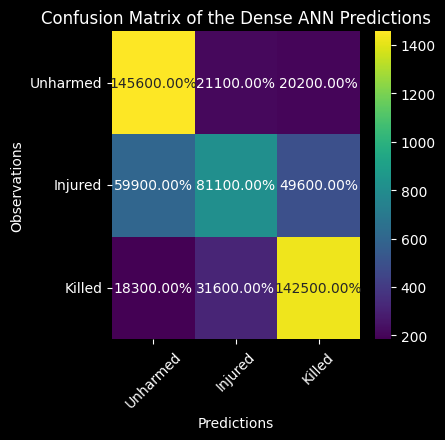

In [10]:
visualization.plot_confusion_matrix(
    y_true=y_test,
    y_pred=test_pred_class,
    model_name=models_df.loc[MODEL_ID, "model"].name.replace("_", " "),
)

## Ordinal Regression with Coral

In [11]:
MODEL_ID = "coral_ann"

NUM_CLASSES = 3
DROPOUT_RATE = 0.4

models_df.loc[MODEL_ID, "model"] = keras.Sequential(
    [
        keras.layers.Dense(128, activation="gelu"),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        keras.layers.Dense(32, activation="gelu"),
        keras.layers.Dropout(rate=DROPOUT_RATE),
        coral.CoralOrdinal(num_classes=NUM_CLASSES),
    ],
    name="Coral_Ordinal_ANN",
)

models_df.loc[MODEL_ID, "model"].compile(
    loss=coral.OrdinalCrossEntropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy", coral.MeanAbsoluteErrorLabels()],
)

In [12]:
models_df.loc[MODEL_ID, "history"] = models_df.loc[MODEL_ID, "model"].fit(
    X_train, y_train, epochs=N_EPOCHS, validation_split=0.1, callbacks=callbacks
)

Epoch 1/20


  1/641 [..............................] - ETA: 19:27 - loss: 1.5691 - accuracy: 0.2500 - mean_absolute_error_labels: 0.9375

 20/641 [..............................] - ETA: 1s - loss: 1.3624 - accuracy: 0.3187 - mean_absolute_error_labels: 0.6984   

 39/641 [>.............................] - ETA: 1s - loss: 1.2660 - accuracy: 0.3309 - mean_absolute_error_labels: 0.6234

 59/641 [=>............................] - ETA: 1s - loss: 1.1900 - accuracy: 0.3385 - mean_absolute_error_labels: 0.5768

 79/641 [==>...........................] - ETA: 1s - loss: 1.1657 - accuracy: 0.3410 - mean_absolute_error_labels: 0.5629

 99/641 [===>..........................] - ETA: 1s - loss: 1.1461 - accuracy: 0.3321 - mean_absolute_error_labels: 0.5533

120/641 [====>.........................] - ETA: 1s - loss: 1.1222 - accuracy: 0.3310 - mean_absolute_error_labels: 0.5367

139/641 [=====>........................] - ETA: 1s - loss: 1.1019 - accuracy: 0.3300 - mean_absolute_error_labels: 0.5263

159/641 [======>.......................] - ETA: 1s - loss: 1.0922 - accuracy: 0.3286 - mean_absolute_error_labels: 0.5234

178/641 [=======>......................] - ETA: 1s - loss: 1.0820 - accuracy: 0.3302 - mean_absolute_error_labels: 0.5221

196/641 [========>.....................] - ETA: 1s - loss: 1.0712 - accuracy: 0.3313 - mean_absolute_error_labels: 0.5166

214/641 [=========>....................] - ETA: 1s - loss: 1.0624 - accuracy: 0.3331 - mean_absolute_error_labels: 0.5131

233/641 [=========>....................] - ETA: 1s - loss: 1.0577 - accuracy: 0.3318 - mean_absolute_error_labels: 0.5103

253/641 [==========>...................] - ETA: 1s - loss: 1.0519 - accuracy: 0.3313 - mean_absolute_error_labels: 0.5075

273/641 [===========>..................] - ETA: 0s - loss: 1.0507 - accuracy: 0.3322 - mean_absolute_error_labels: 0.5084

291/641 [============>.................] - ETA: 0s - loss: 1.0517 - accuracy: 0.3342 - mean_absolute_error_labels: 0.5092

309/641 [=============>................] - ETA: 0s - loss: 1.0453 - accuracy: 0.3344 - mean_absolute_error_labels: 0.5057

328/641 [==============>...............] - ETA: 0s - loss: 1.0459 - accuracy: 0.3350 - mean_absolute_error_labels: 0.5048

345/641 [===============>..............] - ETA: 0s - loss: 1.0426 - accuracy: 0.3364 - mean_absolute_error_labels: 0.5018

367/641 [================>.............] - ETA: 0s - loss: 1.0391 - accuracy: 0.3376 - mean_absolute_error_labels: 0.4985

387/641 [=================>............] - ETA: 0s - loss: 1.0404 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4985

408/641 [==================>...........] - ETA: 0s - loss: 1.0372 - accuracy: 0.3364 - mean_absolute_error_labels: 0.4973

428/641 [===================>..........] - ETA: 0s - loss: 1.0362 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4970

448/641 [===================>..........] - ETA: 0s - loss: 1.0330 - accuracy: 0.3361 - mean_absolute_error_labels: 0.4948

468/641 [====================>.........] - ETA: 0s - loss: 1.0314 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4935

489/641 [=====================>........] - ETA: 0s - loss: 1.0266 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4909

510/641 [======================>.......] - ETA: 0s - loss: 1.0220 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4880

531/641 [=======================>......] - ETA: 0s - loss: 1.0208 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4871

553/641 [========================>.....] - ETA: 0s - loss: 1.0182 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4860

574/641 [=========================>....] - ETA: 0s - loss: 1.0176 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4861

595/641 [==========================>...] - ETA: 0s - loss: 1.0175 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4856

616/641 [===========================>..] - ETA: 0s - loss: 1.0170 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4847

637/641 [============================>.] - ETA: 0s - loss: 1.0166 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4850

641/641 [==============================] - 4s 3ms/step - loss: 1.0168 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4849 - val_loss: 0.8930 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4193 - lr: 0.0100


Epoch 2/20


  1/641 [..............................] - ETA: 1s - loss: 0.7379 - accuracy: 0.5312 - mean_absolute_error_labels: 0.4062

 21/641 [..............................] - ETA: 1s - loss: 0.9470 - accuracy: 0.3244 - mean_absolute_error_labels: 0.4464

 40/641 [>.............................] - ETA: 1s - loss: 0.9562 - accuracy: 0.3469 - mean_absolute_error_labels: 0.4563

 61/641 [=>............................] - ETA: 1s - loss: 0.9675 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4641

 82/641 [==>...........................] - ETA: 1s - loss: 0.9751 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4684

103/641 [===>..........................] - ETA: 1s - loss: 0.9676 - accuracy: 0.3368 - mean_absolute_error_labels: 0.4600

125/641 [====>.........................] - ETA: 1s - loss: 0.9581 - accuracy: 0.3388 - mean_absolute_error_labels: 0.4532

146/641 [=====>........................] - ETA: 1s - loss: 0.9618 - accuracy: 0.3380 - mean_absolute_error_labels: 0.4557

167/641 [======>.......................] - ETA: 1s - loss: 0.9719 - accuracy: 0.3370 - mean_absolute_error_labels: 0.4594

187/641 [=======>......................] - ETA: 1s - loss: 0.9645 - accuracy: 0.3372 - mean_absolute_error_labels: 0.4542

207/641 [========>.....................] - ETA: 1s - loss: 0.9668 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4549

228/641 [=========>....................] - ETA: 1s - loss: 0.9678 - accuracy: 0.3366 - mean_absolute_error_labels: 0.4567

250/641 [==========>...................] - ETA: 0s - loss: 0.9707 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4589

271/641 [===========>..................] - ETA: 0s - loss: 0.9781 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4641

292/641 [============>.................] - ETA: 0s - loss: 0.9803 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4663

313/641 [=============>................] - ETA: 0s - loss: 0.9806 - accuracy: 0.3361 - mean_absolute_error_labels: 0.4663

334/641 [==============>...............] - ETA: 0s - loss: 0.9819 - accuracy: 0.3364 - mean_absolute_error_labels: 0.4672

354/641 [===============>..............] - ETA: 0s - loss: 0.9823 - accuracy: 0.3382 - mean_absolute_error_labels: 0.4677

375/641 [================>.............] - ETA: 0s - loss: 0.9816 - accuracy: 0.3372 - mean_absolute_error_labels: 0.4673

396/641 [=================>............] - ETA: 0s - loss: 0.9814 - accuracy: 0.3366 - mean_absolute_error_labels: 0.4680

417/641 [==================>...........] - ETA: 0s - loss: 0.9815 - accuracy: 0.3360 - mean_absolute_error_labels: 0.4676

437/641 [===================>..........] - ETA: 0s - loss: 0.9826 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4676

457/641 [====================>.........] - ETA: 0s - loss: 0.9814 - accuracy: 0.3345 - mean_absolute_error_labels: 0.4671

478/641 [=====================>........] - ETA: 0s - loss: 0.9813 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4662

499/641 [======================>.......] - ETA: 0s - loss: 0.9824 - accuracy: 0.3361 - mean_absolute_error_labels: 0.4666

521/641 [=======================>......] - ETA: 0s - loss: 0.9817 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4659

542/641 [========================>.....] - ETA: 0s - loss: 0.9836 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4677

563/641 [=========================>....] - ETA: 0s - loss: 0.9830 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4678

584/641 [==========================>...] - ETA: 0s - loss: 0.9838 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4677

605/641 [===========================>..] - ETA: 0s - loss: 0.9851 - accuracy: 0.3324 - mean_absolute_error_labels: 0.4689

626/641 [============================>.] - ETA: 0s - loss: 0.9848 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4687

641/641 [==============================] - 2s 3ms/step - loss: 0.9845 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4688 - val_loss: 0.9008 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4184 - lr: 0.0100


Epoch 3/20


  1/641 [..............................] - ETA: 2s - loss: 1.0494 - accuracy: 0.3750 - mean_absolute_error_labels: 0.5625

 23/641 [>.............................] - ETA: 1s - loss: 0.9549 - accuracy: 0.3274 - mean_absolute_error_labels: 0.4606

 44/641 [=>............................] - ETA: 1s - loss: 0.9459 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4453

 66/641 [==>...........................] - ETA: 1s - loss: 0.9471 - accuracy: 0.3376 - mean_absolute_error_labels: 0.4493

 88/641 [===>..........................] - ETA: 1s - loss: 0.9445 - accuracy: 0.3303 - mean_absolute_error_labels: 0.4464

109/641 [====>.........................] - ETA: 1s - loss: 0.9445 - accuracy: 0.3268 - mean_absolute_error_labels: 0.4470

130/641 [=====>........................] - ETA: 1s - loss: 0.9492 - accuracy: 0.3308 - mean_absolute_error_labels: 0.4442

150/641 [======>.......................] - ETA: 1s - loss: 0.9594 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4496

171/641 [=======>......................] - ETA: 1s - loss: 0.9566 - accuracy: 0.3288 - mean_absolute_error_labels: 0.4476

193/641 [========>.....................] - ETA: 1s - loss: 0.9564 - accuracy: 0.3285 - mean_absolute_error_labels: 0.4466

214/641 [=========>....................] - ETA: 1s - loss: 0.9614 - accuracy: 0.3287 - mean_absolute_error_labels: 0.4457

235/641 [=========>....................] - ETA: 0s - loss: 0.9605 - accuracy: 0.3298 - mean_absolute_error_labels: 0.4457

256/641 [==========>...................] - ETA: 0s - loss: 0.9649 - accuracy: 0.3293 - mean_absolute_error_labels: 0.4502

278/641 [============>.................] - ETA: 0s - loss: 0.9663 - accuracy: 0.3296 - mean_absolute_error_labels: 0.4518

300/641 [=============>................] - ETA: 0s - loss: 0.9696 - accuracy: 0.3276 - mean_absolute_error_labels: 0.4540

321/641 [==============>...............] - ETA: 0s - loss: 0.9663 - accuracy: 0.3278 - mean_absolute_error_labels: 0.4520

342/641 [===============>..............] - ETA: 0s - loss: 0.9665 - accuracy: 0.3294 - mean_absolute_error_labels: 0.4536

363/641 [===============>..............] - ETA: 0s - loss: 0.9675 - accuracy: 0.3310 - mean_absolute_error_labels: 0.4530

384/641 [================>.............] - ETA: 0s - loss: 0.9711 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4557

405/641 [=================>............] - ETA: 0s - loss: 0.9717 - accuracy: 0.3319 - mean_absolute_error_labels: 0.4555

426/641 [==================>...........] - ETA: 0s - loss: 0.9723 - accuracy: 0.3313 - mean_absolute_error_labels: 0.4547

448/641 [===================>..........] - ETA: 0s - loss: 0.9716 - accuracy: 0.3314 - mean_absolute_error_labels: 0.4542

468/641 [====================>.........] - ETA: 0s - loss: 0.9727 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4554

488/641 [=====================>........] - ETA: 0s - loss: 0.9729 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4563

507/641 [======================>.......] - ETA: 0s - loss: 0.9732 - accuracy: 0.3317 - mean_absolute_error_labels: 0.4567

526/641 [=======================>......] - ETA: 0s - loss: 0.9719 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4562

546/641 [========================>.....] - ETA: 0s - loss: 0.9715 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4567

565/641 [=========================>....] - ETA: 0s - loss: 0.9710 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4557

583/641 [==========================>...] - ETA: 0s - loss: 0.9738 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4568

603/641 [===========================>..] - ETA: 0s - loss: 0.9742 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4579

622/641 [============================>.] - ETA: 0s - loss: 0.9719 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4568

641/641 [==============================] - ETA: 0s - loss: 0.9707 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4559

641/641 [==============================] - 2s 3ms/step - loss: 0.9707 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4559 - val_loss: 0.8917 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4145 - lr: 0.0100


Epoch 4/20


  1/641 [..............................] - ETA: 2s - loss: 0.8144 - accuracy: 0.4062 - mean_absolute_error_labels: 0.3438

 22/641 [>.............................] - ETA: 1s - loss: 0.9693 - accuracy: 0.3480 - mean_absolute_error_labels: 0.4688

 44/641 [=>............................] - ETA: 1s - loss: 1.0013 - accuracy: 0.3537 - mean_absolute_error_labels: 0.4709

 65/641 [==>...........................] - ETA: 1s - loss: 0.9883 - accuracy: 0.3495 - mean_absolute_error_labels: 0.4644

 86/641 [===>..........................] - ETA: 1s - loss: 0.9903 - accuracy: 0.3485 - mean_absolute_error_labels: 0.4651

107/641 [====>.........................] - ETA: 1s - loss: 0.9811 - accuracy: 0.3400 - mean_absolute_error_labels: 0.4600

129/641 [=====>........................] - ETA: 1s - loss: 0.9834 - accuracy: 0.3401 - mean_absolute_error_labels: 0.4595

148/641 [=====>........................] - ETA: 1s - loss: 0.9843 - accuracy: 0.3395 - mean_absolute_error_labels: 0.4616

169/641 [======>.......................] - ETA: 1s - loss: 0.9797 - accuracy: 0.3365 - mean_absolute_error_labels: 0.4584

192/641 [=======>......................] - ETA: 1s - loss: 0.9762 - accuracy: 0.3389 - mean_absolute_error_labels: 0.4544

215/641 [=========>....................] - ETA: 1s - loss: 0.9734 - accuracy: 0.3375 - mean_absolute_error_labels: 0.4544

239/641 [==========>...................] - ETA: 0s - loss: 0.9694 - accuracy: 0.3368 - mean_absolute_error_labels: 0.4527

262/641 [===========>..................] - ETA: 0s - loss: 0.9644 - accuracy: 0.3370 - mean_absolute_error_labels: 0.4518

282/641 [============>.................] - ETA: 0s - loss: 0.9660 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4505

303/641 [=============>................] - ETA: 0s - loss: 0.9660 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4500

326/641 [==============>...............] - ETA: 0s - loss: 0.9675 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4506

345/641 [===============>..............] - ETA: 0s - loss: 0.9700 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4530

366/641 [================>.............] - ETA: 0s - loss: 0.9712 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4528

387/641 [=================>............] - ETA: 0s - loss: 0.9710 - accuracy: 0.3325 - mean_absolute_error_labels: 0.4523

408/641 [==================>...........] - ETA: 0s - loss: 0.9715 - accuracy: 0.3316 - mean_absolute_error_labels: 0.4519

430/641 [===================>..........] - ETA: 0s - loss: 0.9741 - accuracy: 0.3318 - mean_absolute_error_labels: 0.4527

452/641 [====================>.........] - ETA: 0s - loss: 0.9774 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4549

474/641 [=====================>........] - ETA: 0s - loss: 0.9773 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4552

495/641 [======================>.......] - ETA: 0s - loss: 0.9773 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4556

514/641 [=======================>......] - ETA: 0s - loss: 0.9781 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4571

535/641 [========================>.....] - ETA: 0s - loss: 0.9781 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4565

557/641 [=========================>....] - ETA: 0s - loss: 0.9796 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4575

578/641 [==========================>...] - ETA: 0s - loss: 0.9806 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4583

599/641 [===========================>..] - ETA: 0s - loss: 0.9812 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4589

620/641 [============================>.] - ETA: 0s - loss: 0.9823 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4591

641/641 [==============================] - ETA: 0s - loss: 0.9820 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4590

641/641 [==============================] - 2s 3ms/step - loss: 0.9820 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4590 - val_loss: 0.8910 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4049 - lr: 0.0100


Epoch 5/20


  1/641 [..............................] - ETA: 2s - loss: 0.6778 - accuracy: 0.3125 - mean_absolute_error_labels: 0.2812

 22/641 [>.............................] - ETA: 1s - loss: 0.8801 - accuracy: 0.3338 - mean_absolute_error_labels: 0.3892

 43/641 [=>............................] - ETA: 1s - loss: 0.9233 - accuracy: 0.3459 - mean_absolute_error_labels: 0.4368

 64/641 [=>............................] - ETA: 1s - loss: 0.9413 - accuracy: 0.3555 - mean_absolute_error_labels: 0.4419

 86/641 [===>..........................] - ETA: 1s - loss: 0.9473 - accuracy: 0.3470 - mean_absolute_error_labels: 0.4400

108/641 [====>.........................] - ETA: 1s - loss: 0.9494 - accuracy: 0.3406 - mean_absolute_error_labels: 0.4424

130/641 [=====>........................] - ETA: 1s - loss: 0.9516 - accuracy: 0.3464 - mean_absolute_error_labels: 0.4435

151/641 [======>.......................] - ETA: 1s - loss: 0.9552 - accuracy: 0.3481 - mean_absolute_error_labels: 0.4437

173/641 [=======>......................] - ETA: 1s - loss: 0.9564 - accuracy: 0.3428 - mean_absolute_error_labels: 0.4445

194/641 [========>.....................] - ETA: 1s - loss: 0.9569 - accuracy: 0.3438 - mean_absolute_error_labels: 0.4473

216/641 [=========>....................] - ETA: 1s - loss: 0.9569 - accuracy: 0.3440 - mean_absolute_error_labels: 0.4475

238/641 [==========>...................] - ETA: 0s - loss: 0.9595 - accuracy: 0.3416 - mean_absolute_error_labels: 0.4483

259/641 [===========>..................] - ETA: 0s - loss: 0.9625 - accuracy: 0.3407 - mean_absolute_error_labels: 0.4491

280/641 [============>.................] - ETA: 0s - loss: 0.9613 - accuracy: 0.3382 - mean_absolute_error_labels: 0.4488

300/641 [=============>................] - ETA: 0s - loss: 0.9644 - accuracy: 0.3386 - mean_absolute_error_labels: 0.4487

322/641 [==============>...............] - ETA: 0s - loss: 0.9612 - accuracy: 0.3400 - mean_absolute_error_labels: 0.4480

343/641 [===============>..............] - ETA: 0s - loss: 0.9602 - accuracy: 0.3392 - mean_absolute_error_labels: 0.4475

364/641 [================>.............] - ETA: 0s - loss: 0.9611 - accuracy: 0.3383 - mean_absolute_error_labels: 0.4463

385/641 [=================>............] - ETA: 0s - loss: 0.9646 - accuracy: 0.3382 - mean_absolute_error_labels: 0.4486

407/641 [==================>...........] - ETA: 0s - loss: 0.9651 - accuracy: 0.3373 - mean_absolute_error_labels: 0.4492

428/641 [===================>..........] - ETA: 0s - loss: 0.9660 - accuracy: 0.3372 - mean_absolute_error_labels: 0.4504

448/641 [===================>..........] - ETA: 0s - loss: 0.9684 - accuracy: 0.3367 - mean_absolute_error_labels: 0.4526

469/641 [====================>.........] - ETA: 0s - loss: 0.9668 - accuracy: 0.3370 - mean_absolute_error_labels: 0.4519

490/641 [=====================>........] - ETA: 0s - loss: 0.9680 - accuracy: 0.3365 - mean_absolute_error_labels: 0.4525

511/641 [======================>.......] - ETA: 0s - loss: 0.9661 - accuracy: 0.3369 - mean_absolute_error_labels: 0.4509

531/641 [=======================>......] - ETA: 0s - loss: 0.9651 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4499

552/641 [========================>.....] - ETA: 0s - loss: 0.9649 - accuracy: 0.3366 - mean_absolute_error_labels: 0.4502

572/641 [=========================>....] - ETA: 0s - loss: 0.9646 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4498

593/641 [==========================>...] - ETA: 0s - loss: 0.9664 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4503

614/641 [===========================>..] - ETA: 0s - loss: 0.9688 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4513

636/641 [============================>.] - ETA: 0s - loss: 0.9682 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4508

641/641 [==============================] - 2s 3ms/step - loss: 0.9680 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4505 - val_loss: 0.9425 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4674 - lr: 0.0100


Epoch 6/20


  1/641 [..............................] - ETA: 2s - loss: 1.2116 - accuracy: 0.3125 - mean_absolute_error_labels: 0.5938

 23/641 [>.............................] - ETA: 1s - loss: 1.0258 - accuracy: 0.3247 - mean_absolute_error_labels: 0.4742

 45/641 [=>............................] - ETA: 1s - loss: 0.9959 - accuracy: 0.3236 - mean_absolute_error_labels: 0.4757

 67/641 [==>...........................] - ETA: 1s - loss: 0.9890 - accuracy: 0.3298 - mean_absolute_error_labels: 0.4641

 86/641 [===>..........................] - ETA: 1s - loss: 0.9802 - accuracy: 0.3325 - mean_absolute_error_labels: 0.4549

107/641 [====>.........................] - ETA: 1s - loss: 0.9822 - accuracy: 0.3318 - mean_absolute_error_labels: 0.4553

128/641 [====>.........................] - ETA: 1s - loss: 0.9857 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4595

147/641 [=====>........................] - ETA: 1s - loss: 0.9795 - accuracy: 0.3310 - mean_absolute_error_labels: 0.4568

168/641 [======>.......................] - ETA: 1s - loss: 0.9794 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4583

189/641 [=======>......................] - ETA: 1s - loss: 0.9759 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4545

210/641 [========>.....................] - ETA: 1s - loss: 0.9807 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4598

232/641 [=========>....................] - ETA: 0s - loss: 0.9786 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4599

253/641 [==========>...................] - ETA: 0s - loss: 0.9796 - accuracy: 0.3366 - mean_absolute_error_labels: 0.4586

274/641 [===========>..................] - ETA: 0s - loss: 0.9750 - accuracy: 0.3378 - mean_absolute_error_labels: 0.4563

293/641 [============>.................] - ETA: 0s - loss: 0.9695 - accuracy: 0.3378 - mean_absolute_error_labels: 0.4521

314/641 [=============>................] - ETA: 0s - loss: 0.9709 - accuracy: 0.3371 - mean_absolute_error_labels: 0.4541

335/641 [==============>...............] - ETA: 0s - loss: 0.9709 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4547

355/641 [===============>..............] - ETA: 0s - loss: 0.9689 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4527

374/641 [================>.............] - ETA: 0s - loss: 0.9700 - accuracy: 0.3351 - mean_absolute_error_labels: 0.4549

394/641 [=================>............] - ETA: 0s - loss: 0.9680 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4526

414/641 [==================>...........] - ETA: 0s - loss: 0.9664 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4523

434/641 [===================>..........] - ETA: 0s - loss: 0.9673 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4520

455/641 [====================>.........] - ETA: 0s - loss: 0.9675 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4541

475/641 [=====================>........] - ETA: 0s - loss: 0.9665 - accuracy: 0.3320 - mean_absolute_error_labels: 0.4545

496/641 [======================>.......] - ETA: 0s - loss: 0.9647 - accuracy: 0.3322 - mean_absolute_error_labels: 0.4543

517/641 [=======================>......] - ETA: 0s - loss: 0.9674 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4559

538/641 [========================>.....] - ETA: 0s - loss: 0.9699 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4568

558/641 [=========================>....] - ETA: 0s - loss: 0.9714 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4575

579/641 [==========================>...] - ETA: 0s - loss: 0.9721 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4571

600/641 [===========================>..] - ETA: 0s - loss: 0.9746 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4580

622/641 [============================>.] - ETA: 0s - loss: 0.9749 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4568

641/641 [==============================] - 2s 3ms/step - loss: 0.9760 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4576 - val_loss: 0.9278 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4614 - lr: 0.0100


Epoch 7/20


  1/641 [..............................] - ETA: 2s - loss: 1.1385 - accuracy: 0.3438 - mean_absolute_error_labels: 0.7188

 22/641 [>.............................] - ETA: 1s - loss: 0.9565 - accuracy: 0.3494 - mean_absolute_error_labels: 0.4545

 43/641 [=>............................] - ETA: 1s - loss: 0.9530 - accuracy: 0.3263 - mean_absolute_error_labels: 0.4419

 64/641 [=>............................] - ETA: 1s - loss: 0.9671 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4526

 85/641 [==>...........................] - ETA: 1s - loss: 0.9787 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4570

106/641 [===>..........................] - ETA: 1s - loss: 0.9778 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4564

127/641 [====>.........................] - ETA: 1s - loss: 0.9736 - accuracy: 0.3322 - mean_absolute_error_labels: 0.4579

148/641 [=====>........................] - ETA: 1s - loss: 0.9669 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4531

169/641 [======>.......................] - ETA: 1s - loss: 0.9692 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4549

191/641 [=======>......................] - ETA: 1s - loss: 0.9688 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4527

212/641 [========>.....................] - ETA: 1s - loss: 0.9648 - accuracy: 0.3320 - mean_absolute_error_labels: 0.4491

234/641 [=========>....................] - ETA: 0s - loss: 0.9663 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4494

255/641 [==========>...................] - ETA: 0s - loss: 0.9672 - accuracy: 0.3314 - mean_absolute_error_labels: 0.4499

276/641 [===========>..................] - ETA: 0s - loss: 0.9678 - accuracy: 0.3312 - mean_absolute_error_labels: 0.4514

297/641 [============>.................] - ETA: 0s - loss: 0.9684 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4502

318/641 [=============>................] - ETA: 0s - loss: 0.9718 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4530

340/641 [==============>...............] - ETA: 0s - loss: 0.9728 - accuracy: 0.3311 - mean_absolute_error_labels: 0.4523

361/641 [===============>..............] - ETA: 0s - loss: 0.9735 - accuracy: 0.3291 - mean_absolute_error_labels: 0.4534

383/641 [================>.............] - ETA: 0s - loss: 0.9725 - accuracy: 0.3305 - mean_absolute_error_labels: 0.4526

405/641 [=================>............] - ETA: 0s - loss: 0.9716 - accuracy: 0.3298 - mean_absolute_error_labels: 0.4510

426/641 [==================>...........] - ETA: 0s - loss: 0.9733 - accuracy: 0.3309 - mean_absolute_error_labels: 0.4523

448/641 [===================>..........] - ETA: 0s - loss: 0.9721 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4523

470/641 [====================>.........] - ETA: 0s - loss: 0.9692 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4507

492/641 [======================>.......] - ETA: 0s - loss: 0.9696 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4508

513/641 [=======================>......] - ETA: 0s - loss: 0.9698 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4513

534/641 [=======================>......] - ETA: 0s - loss: 0.9691 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4510

555/641 [========================>.....] - ETA: 0s - loss: 0.9691 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4511

577/641 [==========================>...] - ETA: 0s - loss: 0.9683 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4506

598/641 [==========================>...] - ETA: 0s - loss: 0.9684 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4500

619/641 [===========================>..] - ETA: 0s - loss: 0.9687 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4497

641/641 [==============================] - ETA: 0s - loss: 0.9680 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4488

641/641 [==============================] - 2s 3ms/step - loss: 0.9680 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4488 - val_loss: 0.8981 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4245 - lr: 0.0100


Epoch 8/20


  1/641 [..............................] - ETA: 2s - loss: 1.1604 - accuracy: 0.2812 - mean_absolute_error_labels: 0.4062

 22/641 [>.............................] - ETA: 1s - loss: 0.9467 - accuracy: 0.3395 - mean_absolute_error_labels: 0.4332

 43/641 [=>............................] - ETA: 1s - loss: 0.9314 - accuracy: 0.3583 - mean_absolute_error_labels: 0.4273

 64/641 [=>............................] - ETA: 1s - loss: 0.9426 - accuracy: 0.3496 - mean_absolute_error_labels: 0.4302

 85/641 [==>...........................] - ETA: 1s - loss: 0.9483 - accuracy: 0.3423 - mean_absolute_error_labels: 0.4390

107/641 [====>.........................] - ETA: 1s - loss: 0.9559 - accuracy: 0.3432 - mean_absolute_error_labels: 0.4410

129/641 [=====>........................] - ETA: 1s - loss: 0.9486 - accuracy: 0.3384 - mean_absolute_error_labels: 0.4327

150/641 [======>.......................] - ETA: 1s - loss: 0.9536 - accuracy: 0.3385 - mean_absolute_error_labels: 0.4360

172/641 [=======>......................] - ETA: 1s - loss: 0.9636 - accuracy: 0.3376 - mean_absolute_error_labels: 0.4433

194/641 [========>.....................] - ETA: 1s - loss: 0.9632 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4439

216/641 [=========>....................] - ETA: 1s - loss: 0.9648 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4414

237/641 [==========>...................] - ETA: 0s - loss: 0.9640 - accuracy: 0.3365 - mean_absolute_error_labels: 0.4434

258/641 [===========>..................] - ETA: 0s - loss: 0.9594 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4411

279/641 [============>.................] - ETA: 0s - loss: 0.9558 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4414

301/641 [=============>................] - ETA: 0s - loss: 0.9568 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4429

322/641 [==============>...............] - ETA: 0s - loss: 0.9582 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4442

343/641 [===============>..............] - ETA: 0s - loss: 0.9569 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4452

364/641 [================>.............] - ETA: 0s - loss: 0.9559 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4443

385/641 [=================>............] - ETA: 0s - loss: 0.9577 - accuracy: 0.3317 - mean_absolute_error_labels: 0.4463

406/641 [==================>...........] - ETA: 0s - loss: 0.9543 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4446

427/641 [==================>...........] - ETA: 0s - loss: 0.9557 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4459

447/641 [===================>..........] - ETA: 0s - loss: 0.9558 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4460

469/641 [====================>.........] - ETA: 0s - loss: 0.9566 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4454

490/641 [=====================>........] - ETA: 0s - loss: 0.9583 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4467

512/641 [======================>.......] - ETA: 0s - loss: 0.9599 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4485

534/641 [=======================>......] - ETA: 0s - loss: 0.9621 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4499

555/641 [========================>.....] - ETA: 0s - loss: 0.9607 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4486

576/641 [=========================>....] - ETA: 0s - loss: 0.9629 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4502

598/641 [==========================>...] - ETA: 0s - loss: 0.9622 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4506

620/641 [============================>.] - ETA: 0s - loss: 0.9637 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4516

641/641 [==============================] - 2s 3ms/step - loss: 0.9648 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4523 - val_loss: 0.9320 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4592 - lr: 0.0100


Epoch 9/20


  1/641 [..............................] - ETA: 2s - loss: 0.6543 - accuracy: 0.2812 - mean_absolute_error_labels: 0.2500

 22/641 [>.............................] - ETA: 1s - loss: 0.9548 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4318

 43/641 [=>............................] - ETA: 1s - loss: 0.9765 - accuracy: 0.3125 - mean_absolute_error_labels: 0.4578

 64/641 [=>............................] - ETA: 1s - loss: 0.9631 - accuracy: 0.3232 - mean_absolute_error_labels: 0.4502

 84/641 [==>...........................] - ETA: 1s - loss: 0.9569 - accuracy: 0.3304 - mean_absolute_error_labels: 0.4483

106/641 [===>..........................] - ETA: 1s - loss: 0.9735 - accuracy: 0.3305 - mean_absolute_error_labels: 0.4611

127/641 [====>.........................] - ETA: 1s - loss: 0.9636 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4503

148/641 [=====>........................] - ETA: 1s - loss: 0.9562 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4417

168/641 [======>.......................] - ETA: 1s - loss: 0.9547 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4390

187/641 [=======>......................] - ETA: 1s - loss: 0.9560 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4393

208/641 [========>.....................] - ETA: 1s - loss: 0.9532 - accuracy: 0.3371 - mean_absolute_error_labels: 0.4405

230/641 [=========>....................] - ETA: 1s - loss: 0.9582 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4442

251/641 [==========>...................] - ETA: 0s - loss: 0.9584 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4419

273/641 [===========>..................] - ETA: 0s - loss: 0.9601 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4410

294/641 [============>.................] - ETA: 0s - loss: 0.9599 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4420

315/641 [=============>................] - ETA: 0s - loss: 0.9648 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4453

337/641 [==============>...............] - ETA: 0s - loss: 0.9629 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4447

358/641 [===============>..............] - ETA: 0s - loss: 0.9611 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4433

380/641 [================>.............] - ETA: 0s - loss: 0.9594 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4433

402/641 [=================>............] - ETA: 0s - loss: 0.9601 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4439

424/641 [==================>...........] - ETA: 0s - loss: 0.9605 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4441

445/641 [===================>..........] - ETA: 0s - loss: 0.9585 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4431

466/641 [====================>.........] - ETA: 0s - loss: 0.9605 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4445

487/641 [=====================>........] - ETA: 0s - loss: 0.9649 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4457

509/641 [======================>.......] - ETA: 0s - loss: 0.9642 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4466

531/641 [=======================>......] - ETA: 0s - loss: 0.9653 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4477

552/641 [========================>.....] - ETA: 0s - loss: 0.9656 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4483

574/641 [=========================>....] - ETA: 0s - loss: 0.9677 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4495

595/641 [==========================>...] - ETA: 0s - loss: 0.9681 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4493

615/641 [===========================>..] - ETA: 0s - loss: 0.9697 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4499

636/641 [============================>.] - ETA: 0s - loss: 0.9686 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4499

641/641 [==============================] - 2s 3ms/step - loss: 0.9695 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4504 - val_loss: 0.8987 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4288 - lr: 0.0100


Epoch 10/20


  1/641 [..............................] - ETA: 2s - loss: 0.8941 - accuracy: 0.3750 - mean_absolute_error_labels: 0.4375

 20/641 [..............................] - ETA: 1s - loss: 0.9436 - accuracy: 0.3625 - mean_absolute_error_labels: 0.4359

 42/641 [>.............................] - ETA: 1s - loss: 0.9468 - accuracy: 0.3452 - mean_absolute_error_labels: 0.4338

 65/641 [==>...........................] - ETA: 1s - loss: 0.9396 - accuracy: 0.3404 - mean_absolute_error_labels: 0.4332

 87/641 [===>..........................] - ETA: 1s - loss: 0.9615 - accuracy: 0.3416 - mean_absolute_error_labels: 0.4465

110/641 [====>.........................] - ETA: 1s - loss: 0.9650 - accuracy: 0.3386 - mean_absolute_error_labels: 0.4469

133/641 [=====>........................] - ETA: 1s - loss: 0.9644 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4453

155/641 [======>.......................] - ETA: 1s - loss: 0.9554 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4375

178/641 [=======>......................] - ETA: 1s - loss: 0.9522 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4379

200/641 [========>.....................] - ETA: 1s - loss: 0.9549 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4378

220/641 [=========>....................] - ETA: 0s - loss: 0.9598 - accuracy: 0.3374 - mean_absolute_error_labels: 0.4406

239/641 [==========>...................] - ETA: 0s - loss: 0.9572 - accuracy: 0.3358 - mean_absolute_error_labels: 0.4368

260/641 [===========>..................] - ETA: 0s - loss: 0.9613 - accuracy: 0.3376 - mean_absolute_error_labels: 0.4416

281/641 [============>.................] - ETA: 0s - loss: 0.9608 - accuracy: 0.3364 - mean_absolute_error_labels: 0.4434

302/641 [=============>................] - ETA: 0s - loss: 0.9622 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4455

323/641 [==============>...............] - ETA: 0s - loss: 0.9620 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4461

344/641 [===============>..............] - ETA: 0s - loss: 0.9611 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4459

365/641 [================>.............] - ETA: 0s - loss: 0.9629 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4479

387/641 [=================>............] - ETA: 0s - loss: 0.9608 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4457

409/641 [==================>...........] - ETA: 0s - loss: 0.9631 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4468

431/641 [===================>..........] - ETA: 0s - loss: 0.9678 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4499

452/641 [====================>.........] - ETA: 0s - loss: 0.9675 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4491

473/641 [=====================>........] - ETA: 0s - loss: 0.9671 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4493

495/641 [======================>.......] - ETA: 0s - loss: 0.9652 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4490

516/641 [=======================>......] - ETA: 0s - loss: 0.9641 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4484

538/641 [========================>.....] - ETA: 0s - loss: 0.9629 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4484

560/641 [=========================>....] - ETA: 0s - loss: 0.9609 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4469

582/641 [==========================>...] - ETA: 0s - loss: 0.9599 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4458

604/641 [===========================>..] - ETA: 0s - loss: 0.9605 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4457

624/641 [============================>.] - ETA: 0s - loss: 0.9592 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4451

641/641 [==============================] - 2s 3ms/step - loss: 0.9608 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4460 - val_loss: 0.9481 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4722 - lr: 0.0100


Epoch 11/20


  1/641 [..............................] - ETA: 2s - loss: 0.8703 - accuracy: 0.4062 - mean_absolute_error_labels: 0.4375

 23/641 [>.............................] - ETA: 1s - loss: 0.9320 - accuracy: 0.3302 - mean_absolute_error_labels: 0.4158

 44/641 [=>............................] - ETA: 1s - loss: 0.9349 - accuracy: 0.3295 - mean_absolute_error_labels: 0.4311

 64/641 [=>............................] - ETA: 1s - loss: 0.9356 - accuracy: 0.3247 - mean_absolute_error_labels: 0.4375

 85/641 [==>...........................] - ETA: 1s - loss: 0.9328 - accuracy: 0.3239 - mean_absolute_error_labels: 0.4375

107/641 [====>.........................] - ETA: 1s - loss: 0.9357 - accuracy: 0.3213 - mean_absolute_error_labels: 0.4401

127/641 [====>.........................] - ETA: 1s - loss: 0.9350 - accuracy: 0.3187 - mean_absolute_error_labels: 0.4417

148/641 [=====>........................] - ETA: 1s - loss: 0.9310 - accuracy: 0.3205 - mean_absolute_error_labels: 0.4392

170/641 [======>.......................] - ETA: 1s - loss: 0.9289 - accuracy: 0.3153 - mean_absolute_error_labels: 0.4340

187/641 [=======>......................] - ETA: 1s - loss: 0.9321 - accuracy: 0.3175 - mean_absolute_error_labels: 0.4352

203/641 [========>.....................] - ETA: 1s - loss: 0.9331 - accuracy: 0.3188 - mean_absolute_error_labels: 0.4372

221/641 [=========>....................] - ETA: 1s - loss: 0.9298 - accuracy: 0.3204 - mean_absolute_error_labels: 0.4333

241/641 [==========>...................] - ETA: 1s - loss: 0.9287 - accuracy: 0.3218 - mean_absolute_error_labels: 0.4315

262/641 [===========>..................] - ETA: 0s - loss: 0.9297 - accuracy: 0.3243 - mean_absolute_error_labels: 0.4326

283/641 [============>.................] - ETA: 0s - loss: 0.9301 - accuracy: 0.3258 - mean_absolute_error_labels: 0.4324

304/641 [=============>................] - ETA: 0s - loss: 0.9264 - accuracy: 0.3265 - mean_absolute_error_labels: 0.4298

326/641 [==============>...............] - ETA: 0s - loss: 0.9253 - accuracy: 0.3275 - mean_absolute_error_labels: 0.4298

347/641 [===============>..............] - ETA: 0s - loss: 0.9278 - accuracy: 0.3287 - mean_absolute_error_labels: 0.4323

369/641 [================>.............] - ETA: 0s - loss: 0.9302 - accuracy: 0.3295 - mean_absolute_error_labels: 0.4344

390/641 [=================>............] - ETA: 0s - loss: 0.9299 - accuracy: 0.3297 - mean_absolute_error_labels: 0.4336

412/641 [==================>...........] - ETA: 0s - loss: 0.9303 - accuracy: 0.3306 - mean_absolute_error_labels: 0.4339

434/641 [===================>..........] - ETA: 0s - loss: 0.9318 - accuracy: 0.3312 - mean_absolute_error_labels: 0.4346

455/641 [====================>.........] - ETA: 0s - loss: 0.9304 - accuracy: 0.3314 - mean_absolute_error_labels: 0.4340

475/641 [=====================>........] - ETA: 0s - loss: 0.9319 - accuracy: 0.3310 - mean_absolute_error_labels: 0.4352

496/641 [======================>.......] - ETA: 0s - loss: 0.9336 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4366

518/641 [=======================>......] - ETA: 0s - loss: 0.9349 - accuracy: 0.3324 - mean_absolute_error_labels: 0.4373

541/641 [========================>.....] - ETA: 0s - loss: 0.9361 - accuracy: 0.3323 - mean_absolute_error_labels: 0.4374

562/641 [=========================>....] - ETA: 0s - loss: 0.9355 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4367

584/641 [==========================>...] - ETA: 0s - loss: 0.9358 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4372

606/641 [===========================>..] - ETA: 0s - loss: 0.9350 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4363

628/641 [============================>.] - ETA: 0s - loss: 0.9348 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4361

641/641 [==============================] - 2s 3ms/step - loss: 0.9344 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4355 - val_loss: 0.8980 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4128 - lr: 0.0075


Epoch 12/20


  1/641 [..............................] - ETA: 2s - loss: 0.9217 - accuracy: 0.5000 - mean_absolute_error_labels: 0.4688

 22/641 [>.............................] - ETA: 1s - loss: 0.9138 - accuracy: 0.3707 - mean_absolute_error_labels: 0.4176

 43/641 [=>............................] - ETA: 1s - loss: 0.9365 - accuracy: 0.3503 - mean_absolute_error_labels: 0.4259

 65/641 [==>...........................] - ETA: 1s - loss: 0.9362 - accuracy: 0.3322 - mean_absolute_error_labels: 0.4293

 87/641 [===>..........................] - ETA: 1s - loss: 0.9311 - accuracy: 0.3355 - mean_absolute_error_labels: 0.4289

108/641 [====>.........................] - ETA: 1s - loss: 0.9315 - accuracy: 0.3284 - mean_absolute_error_labels: 0.4297

129/641 [=====>........................] - ETA: 1s - loss: 0.9235 - accuracy: 0.3278 - mean_absolute_error_labels: 0.4256

150/641 [======>.......................] - ETA: 1s - loss: 0.9323 - accuracy: 0.3277 - mean_absolute_error_labels: 0.4327

170/641 [======>.......................] - ETA: 1s - loss: 0.9391 - accuracy: 0.3283 - mean_absolute_error_labels: 0.4397

190/641 [=======>......................] - ETA: 1s - loss: 0.9392 - accuracy: 0.3276 - mean_absolute_error_labels: 0.4391

212/641 [========>.....................] - ETA: 1s - loss: 0.9359 - accuracy: 0.3262 - mean_absolute_error_labels: 0.4365

233/641 [=========>....................] - ETA: 0s - loss: 0.9341 - accuracy: 0.3264 - mean_absolute_error_labels: 0.4374

254/641 [==========>...................] - ETA: 0s - loss: 0.9299 - accuracy: 0.3265 - mean_absolute_error_labels: 0.4344

276/641 [===========>..................] - ETA: 0s - loss: 0.9338 - accuracy: 0.3267 - mean_absolute_error_labels: 0.4349

298/641 [============>.................] - ETA: 0s - loss: 0.9301 - accuracy: 0.3268 - mean_absolute_error_labels: 0.4332

319/641 [=============>................] - ETA: 0s - loss: 0.9303 - accuracy: 0.3259 - mean_absolute_error_labels: 0.4321

339/641 [==============>...............] - ETA: 0s - loss: 0.9338 - accuracy: 0.3261 - mean_absolute_error_labels: 0.4345

361/641 [===============>..............] - ETA: 0s - loss: 0.9346 - accuracy: 0.3273 - mean_absolute_error_labels: 0.4338

381/641 [================>.............] - ETA: 0s - loss: 0.9320 - accuracy: 0.3299 - mean_absolute_error_labels: 0.4309

402/641 [=================>............] - ETA: 0s - loss: 0.9333 - accuracy: 0.3303 - mean_absolute_error_labels: 0.4321

423/641 [==================>...........] - ETA: 0s - loss: 0.9300 - accuracy: 0.3302 - mean_absolute_error_labels: 0.4313

444/641 [===================>..........] - ETA: 0s - loss: 0.9317 - accuracy: 0.3299 - mean_absolute_error_labels: 0.4327

466/641 [====================>.........] - ETA: 0s - loss: 0.9301 - accuracy: 0.3303 - mean_absolute_error_labels: 0.4319

487/641 [=====================>........] - ETA: 0s - loss: 0.9305 - accuracy: 0.3301 - mean_absolute_error_labels: 0.4320

507/641 [======================>.......] - ETA: 0s - loss: 0.9298 - accuracy: 0.3320 - mean_absolute_error_labels: 0.4323

528/641 [=======================>......] - ETA: 0s - loss: 0.9295 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4312

547/641 [========================>.....] - ETA: 0s - loss: 0.9290 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4304

568/641 [=========================>....] - ETA: 0s - loss: 0.9299 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4306

590/641 [==========================>...] - ETA: 0s - loss: 0.9301 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4298

611/641 [===========================>..] - ETA: 0s - loss: 0.9303 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4302

632/641 [============================>.] - ETA: 0s - loss: 0.9316 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4302

641/641 [==============================] - 2s 3ms/step - loss: 0.9310 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4304 - val_loss: 0.8940 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4119 - lr: 0.0075


Epoch 13/20


  1/641 [..............................] - ETA: 1s - loss: 1.0826 - accuracy: 0.3438 - mean_absolute_error_labels: 0.5625

 22/641 [>.............................] - ETA: 1s - loss: 0.9039 - accuracy: 0.3665 - mean_absolute_error_labels: 0.4105

 43/641 [=>............................] - ETA: 1s - loss: 0.9194 - accuracy: 0.3481 - mean_absolute_error_labels: 0.4179

 65/641 [==>...........................] - ETA: 1s - loss: 0.9248 - accuracy: 0.3375 - mean_absolute_error_labels: 0.4149

 85/641 [==>...........................] - ETA: 1s - loss: 0.9223 - accuracy: 0.3386 - mean_absolute_error_labels: 0.4224

107/641 [====>.........................] - ETA: 1s - loss: 0.9212 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4241

127/641 [====>.........................] - ETA: 1s - loss: 0.9223 - accuracy: 0.3361 - mean_absolute_error_labels: 0.4247

149/641 [=====>........................] - ETA: 1s - loss: 0.9204 - accuracy: 0.3358 - mean_absolute_error_labels: 0.4234

171/641 [=======>......................] - ETA: 1s - loss: 0.9220 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4242

193/641 [========>.....................] - ETA: 1s - loss: 0.9258 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4286

215/641 [=========>....................] - ETA: 1s - loss: 0.9228 - accuracy: 0.3317 - mean_absolute_error_labels: 0.4266

238/641 [==========>...................] - ETA: 0s - loss: 0.9219 - accuracy: 0.3301 - mean_absolute_error_labels: 0.4253

260/641 [===========>..................] - ETA: 0s - loss: 0.9299 - accuracy: 0.3314 - mean_absolute_error_labels: 0.4306

282/641 [============>.................] - ETA: 0s - loss: 0.9261 - accuracy: 0.3316 - mean_absolute_error_labels: 0.4284

304/641 [=============>................] - ETA: 0s - loss: 0.9280 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4288

326/641 [==============>...............] - ETA: 0s - loss: 0.9278 - accuracy: 0.3320 - mean_absolute_error_labels: 0.4293

346/641 [===============>..............] - ETA: 0s - loss: 0.9294 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4296

367/641 [================>.............] - ETA: 0s - loss: 0.9310 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4308

388/641 [=================>............] - ETA: 0s - loss: 0.9326 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4332

410/641 [==================>...........] - ETA: 0s - loss: 0.9314 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4321

431/641 [===================>..........] - ETA: 0s - loss: 0.9315 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4334

453/641 [====================>.........] - ETA: 0s - loss: 0.9303 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4318

475/641 [=====================>........] - ETA: 0s - loss: 0.9275 - accuracy: 0.3347 - mean_absolute_error_labels: 0.4307

497/641 [======================>.......] - ETA: 0s - loss: 0.9250 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4296

519/641 [=======================>......] - ETA: 0s - loss: 0.9250 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4292

539/641 [========================>.....] - ETA: 0s - loss: 0.9265 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4292

560/641 [=========================>....] - ETA: 0s - loss: 0.9281 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4294

580/641 [==========================>...] - ETA: 0s - loss: 0.9271 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4287

601/641 [===========================>..] - ETA: 0s - loss: 0.9276 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4291

622/641 [============================>.] - ETA: 0s - loss: 0.9289 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4291

641/641 [==============================] - 2s 3ms/step - loss: 0.9287 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4292 - val_loss: 0.8902 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4197 - lr: 0.0075


Epoch 14/20


  1/641 [..............................] - ETA: 2s - loss: 0.9591 - accuracy: 0.2188 - mean_absolute_error_labels: 0.3750

 22/641 [>.............................] - ETA: 1s - loss: 0.9116 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4077

 43/641 [=>............................] - ETA: 1s - loss: 0.8962 - accuracy: 0.3314 - mean_absolute_error_labels: 0.4055

 63/641 [=>............................] - ETA: 1s - loss: 0.8869 - accuracy: 0.3398 - mean_absolute_error_labels: 0.4067

 85/641 [==>...........................] - ETA: 1s - loss: 0.8995 - accuracy: 0.3368 - mean_absolute_error_labels: 0.4121

107/641 [====>.........................] - ETA: 1s - loss: 0.9100 - accuracy: 0.3373 - mean_absolute_error_labels: 0.4147

128/641 [====>.........................] - ETA: 1s - loss: 0.9234 - accuracy: 0.3391 - mean_absolute_error_labels: 0.4209

150/641 [======>.......................] - ETA: 1s - loss: 0.9237 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4265

171/641 [=======>......................] - ETA: 1s - loss: 0.9254 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4256

192/641 [=======>......................] - ETA: 1s - loss: 0.9255 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4258

213/641 [========>.....................] - ETA: 1s - loss: 0.9235 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4250

234/641 [=========>....................] - ETA: 0s - loss: 0.9242 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4243

255/641 [==========>...................] - ETA: 0s - loss: 0.9218 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4252

276/641 [===========>..................] - ETA: 0s - loss: 0.9231 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4257

298/641 [============>.................] - ETA: 0s - loss: 0.9267 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4277

320/641 [=============>................] - ETA: 0s - loss: 0.9286 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4287

341/641 [==============>...............] - ETA: 0s - loss: 0.9263 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4284

362/641 [===============>..............] - ETA: 0s - loss: 0.9303 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4303

380/641 [================>.............] - ETA: 0s - loss: 0.9308 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4305

399/641 [=================>............] - ETA: 0s - loss: 0.9287 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4297

420/641 [==================>...........] - ETA: 0s - loss: 0.9289 - accuracy: 0.3355 - mean_absolute_error_labels: 0.4305

441/641 [===================>..........] - ETA: 0s - loss: 0.9266 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4286

461/641 [====================>.........] - ETA: 0s - loss: 0.9268 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4275

481/641 [=====================>........] - ETA: 0s - loss: 0.9271 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4283

502/641 [======================>.......] - ETA: 0s - loss: 0.9240 - accuracy: 0.3345 - mean_absolute_error_labels: 0.4259

523/641 [=======================>......] - ETA: 0s - loss: 0.9238 - accuracy: 0.3353 - mean_absolute_error_labels: 0.4252

545/641 [========================>.....] - ETA: 0s - loss: 0.9244 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4255

566/641 [=========================>....] - ETA: 0s - loss: 0.9246 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4266

587/641 [==========================>...] - ETA: 0s - loss: 0.9255 - accuracy: 0.3345 - mean_absolute_error_labels: 0.4277

607/641 [===========================>..] - ETA: 0s - loss: 0.9246 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4266

627/641 [============================>.] - ETA: 0s - loss: 0.9236 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4255

641/641 [==============================] - 2s 3ms/step - loss: 0.9238 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4256 - val_loss: 0.8915 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4214 - lr: 0.0075


Epoch 15/20


  1/641 [..............................] - ETA: 2s - loss: 0.6025 - accuracy: 0.3750 - mean_absolute_error_labels: 0.2500

 23/641 [>.............................] - ETA: 1s - loss: 0.8658 - accuracy: 0.3342 - mean_absolute_error_labels: 0.3913

 44/641 [=>............................] - ETA: 1s - loss: 0.8899 - accuracy: 0.3168 - mean_absolute_error_labels: 0.3970

 66/641 [==>...........................] - ETA: 1s - loss: 0.8914 - accuracy: 0.3201 - mean_absolute_error_labels: 0.3987

 87/641 [===>..........................] - ETA: 1s - loss: 0.8977 - accuracy: 0.3233 - mean_absolute_error_labels: 0.4080

108/641 [====>.........................] - ETA: 1s - loss: 0.8994 - accuracy: 0.3232 - mean_absolute_error_labels: 0.4083

130/641 [=====>........................] - ETA: 1s - loss: 0.9060 - accuracy: 0.3216 - mean_absolute_error_labels: 0.4125

152/641 [======>.......................] - ETA: 1s - loss: 0.9025 - accuracy: 0.3257 - mean_absolute_error_labels: 0.4124

172/641 [=======>......................] - ETA: 1s - loss: 0.9065 - accuracy: 0.3249 - mean_absolute_error_labels: 0.4157

193/641 [========>.....................] - ETA: 1s - loss: 0.9097 - accuracy: 0.3272 - mean_absolute_error_labels: 0.4177

214/641 [=========>....................] - ETA: 1s - loss: 0.9102 - accuracy: 0.3270 - mean_absolute_error_labels: 0.4178

236/641 [==========>...................] - ETA: 0s - loss: 0.9064 - accuracy: 0.3255 - mean_absolute_error_labels: 0.4151

258/641 [===========>..................] - ETA: 0s - loss: 0.9085 - accuracy: 0.3267 - mean_absolute_error_labels: 0.4167

279/641 [============>.................] - ETA: 0s - loss: 0.9106 - accuracy: 0.3290 - mean_absolute_error_labels: 0.4185

300/641 [=============>................] - ETA: 0s - loss: 0.9153 - accuracy: 0.3283 - mean_absolute_error_labels: 0.4204

322/641 [==============>...............] - ETA: 0s - loss: 0.9158 - accuracy: 0.3280 - mean_absolute_error_labels: 0.4210

343/641 [===============>..............] - ETA: 0s - loss: 0.9202 - accuracy: 0.3296 - mean_absolute_error_labels: 0.4231

364/641 [================>.............] - ETA: 0s - loss: 0.9213 - accuracy: 0.3310 - mean_absolute_error_labels: 0.4233

385/641 [=================>............] - ETA: 0s - loss: 0.9246 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4257

406/641 [==================>...........] - ETA: 0s - loss: 0.9250 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4260

428/641 [===================>..........] - ETA: 0s - loss: 0.9248 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4259

449/641 [====================>.........] - ETA: 0s - loss: 0.9248 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4251

471/641 [=====================>........] - ETA: 0s - loss: 0.9259 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4266

492/641 [======================>.......] - ETA: 0s - loss: 0.9272 - accuracy: 0.3355 - mean_absolute_error_labels: 0.4277

514/641 [=======================>......] - ETA: 0s - loss: 0.9266 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4266

536/641 [========================>.....] - ETA: 0s - loss: 0.9283 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4272

557/641 [=========================>....] - ETA: 0s - loss: 0.9285 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4272

578/641 [==========================>...] - ETA: 0s - loss: 0.9299 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4277

598/641 [==========================>...] - ETA: 0s - loss: 0.9316 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4284

619/641 [===========================>..] - ETA: 0s - loss: 0.9303 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4280

641/641 [==============================] - ETA: 0s - loss: 0.9289 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4269

641/641 [==============================] - 2s 3ms/step - loss: 0.9289 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4269 - val_loss: 0.9035 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4158 - lr: 0.0075


Epoch 16/20


  1/641 [..............................] - ETA: 1s - loss: 0.7910 - accuracy: 0.3750 - mean_absolute_error_labels: 0.3750

 23/641 [>.............................] - ETA: 1s - loss: 0.8541 - accuracy: 0.3573 - mean_absolute_error_labels: 0.3777

 45/641 [=>............................] - ETA: 1s - loss: 0.8768 - accuracy: 0.3486 - mean_absolute_error_labels: 0.4007

 66/641 [==>...........................] - ETA: 1s - loss: 0.8718 - accuracy: 0.3480 - mean_absolute_error_labels: 0.3944

 85/641 [==>...........................] - ETA: 1s - loss: 0.8881 - accuracy: 0.3474 - mean_absolute_error_labels: 0.4000

106/641 [===>..........................] - ETA: 1s - loss: 0.8880 - accuracy: 0.3470 - mean_absolute_error_labels: 0.4027

127/641 [====>.........................] - ETA: 1s - loss: 0.8954 - accuracy: 0.3435 - mean_absolute_error_labels: 0.4055

148/641 [=====>........................] - ETA: 1s - loss: 0.8965 - accuracy: 0.3402 - mean_absolute_error_labels: 0.4086

167/641 [======>.......................] - ETA: 1s - loss: 0.9019 - accuracy: 0.3381 - mean_absolute_error_labels: 0.4098

188/641 [=======>......................] - ETA: 1s - loss: 0.9055 - accuracy: 0.3394 - mean_absolute_error_labels: 0.4117

210/641 [========>.....................] - ETA: 1s - loss: 0.9069 - accuracy: 0.3399 - mean_absolute_error_labels: 0.4118

231/641 [=========>....................] - ETA: 1s - loss: 0.9068 - accuracy: 0.3370 - mean_absolute_error_labels: 0.4131

252/641 [==========>...................] - ETA: 0s - loss: 0.9072 - accuracy: 0.3366 - mean_absolute_error_labels: 0.4149

273/641 [===========>..................] - ETA: 0s - loss: 0.9112 - accuracy: 0.3360 - mean_absolute_error_labels: 0.4179

294/641 [============>.................] - ETA: 0s - loss: 0.9130 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4189

315/641 [=============>................] - ETA: 0s - loss: 0.9141 - accuracy: 0.3345 - mean_absolute_error_labels: 0.4199

335/641 [==============>...............] - ETA: 0s - loss: 0.9157 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4227

356/641 [===============>..............] - ETA: 0s - loss: 0.9141 - accuracy: 0.3337 - mean_absolute_error_labels: 0.4228

378/641 [================>.............] - ETA: 0s - loss: 0.9119 - accuracy: 0.3364 - mean_absolute_error_labels: 0.4215

399/641 [=================>............] - ETA: 0s - loss: 0.9139 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4217

421/641 [==================>...........] - ETA: 0s - loss: 0.9155 - accuracy: 0.3359 - mean_absolute_error_labels: 0.4217

442/641 [===================>..........] - ETA: 0s - loss: 0.9166 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4224

463/641 [====================>.........] - ETA: 0s - loss: 0.9142 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4204

484/641 [=====================>........] - ETA: 0s - loss: 0.9131 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4194

505/641 [======================>.......] - ETA: 0s - loss: 0.9135 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4192

527/641 [=======================>......] - ETA: 0s - loss: 0.9147 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4203

548/641 [========================>.....] - ETA: 0s - loss: 0.9145 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4209

569/641 [=========================>....] - ETA: 0s - loss: 0.9142 - accuracy: 0.3350 - mean_absolute_error_labels: 0.4214

590/641 [==========================>...] - ETA: 0s - loss: 0.9152 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4217

611/641 [===========================>..] - ETA: 0s - loss: 0.9147 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4210

632/641 [============================>.] - ETA: 0s - loss: 0.9149 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4213

641/641 [==============================] - 2s 3ms/step - loss: 0.9157 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4212 - val_loss: 0.8982 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4197 - lr: 0.0075


Epoch 17/20


  1/641 [..............................] - ETA: 1s - loss: 0.9865 - accuracy: 0.5312 - mean_absolute_error_labels: 0.5312

 20/641 [..............................] - ETA: 1s - loss: 0.9860 - accuracy: 0.3594 - mean_absolute_error_labels: 0.4594

 38/641 [>.............................] - ETA: 1s - loss: 0.9272 - accuracy: 0.3553 - mean_absolute_error_labels: 0.4227

 59/641 [=>............................] - ETA: 1s - loss: 0.9139 - accuracy: 0.3406 - mean_absolute_error_labels: 0.4153

 80/641 [==>...........................] - ETA: 1s - loss: 0.9142 - accuracy: 0.3395 - mean_absolute_error_labels: 0.4160

101/641 [===>..........................] - ETA: 1s - loss: 0.8968 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4041

123/641 [====>.........................] - ETA: 1s - loss: 0.9017 - accuracy: 0.3351 - mean_absolute_error_labels: 0.4045

144/641 [=====>........................] - ETA: 1s - loss: 0.9022 - accuracy: 0.3366 - mean_absolute_error_labels: 0.4052

164/641 [======>.......................] - ETA: 1s - loss: 0.9083 - accuracy: 0.3392 - mean_absolute_error_labels: 0.4114

184/641 [=======>......................] - ETA: 1s - loss: 0.9122 - accuracy: 0.3378 - mean_absolute_error_labels: 0.4129

205/641 [========>.....................] - ETA: 1s - loss: 0.9177 - accuracy: 0.3405 - mean_absolute_error_labels: 0.4157

226/641 [=========>....................] - ETA: 1s - loss: 0.9186 - accuracy: 0.3392 - mean_absolute_error_labels: 0.4166

248/641 [==========>...................] - ETA: 0s - loss: 0.9182 - accuracy: 0.3397 - mean_absolute_error_labels: 0.4165

269/641 [===========>..................] - ETA: 0s - loss: 0.9211 - accuracy: 0.3376 - mean_absolute_error_labels: 0.4190

290/641 [============>.................] - ETA: 0s - loss: 0.9184 - accuracy: 0.3389 - mean_absolute_error_labels: 0.4186

310/641 [=============>................] - ETA: 0s - loss: 0.9199 - accuracy: 0.3383 - mean_absolute_error_labels: 0.4199

332/641 [==============>...............] - ETA: 0s - loss: 0.9220 - accuracy: 0.3384 - mean_absolute_error_labels: 0.4209

354/641 [===============>..............] - ETA: 0s - loss: 0.9199 - accuracy: 0.3377 - mean_absolute_error_labels: 0.4187

376/641 [================>.............] - ETA: 0s - loss: 0.9197 - accuracy: 0.3374 - mean_absolute_error_labels: 0.4181

398/641 [=================>............] - ETA: 0s - loss: 0.9189 - accuracy: 0.3383 - mean_absolute_error_labels: 0.4195

419/641 [==================>...........] - ETA: 0s - loss: 0.9188 - accuracy: 0.3373 - mean_absolute_error_labels: 0.4187

441/641 [===================>..........] - ETA: 0s - loss: 0.9192 - accuracy: 0.3368 - mean_absolute_error_labels: 0.4191

462/641 [====================>.........] - ETA: 0s - loss: 0.9183 - accuracy: 0.3356 - mean_absolute_error_labels: 0.4179

484/641 [=====================>........] - ETA: 0s - loss: 0.9201 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4195

505/641 [======================>.......] - ETA: 0s - loss: 0.9177 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4175

526/641 [=======================>......] - ETA: 0s - loss: 0.9171 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4163

547/641 [========================>.....] - ETA: 0s - loss: 0.9177 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4168

568/641 [=========================>....] - ETA: 0s - loss: 0.9174 - accuracy: 0.3373 - mean_absolute_error_labels: 0.4175

590/641 [==========================>...] - ETA: 0s - loss: 0.9164 - accuracy: 0.3363 - mean_absolute_error_labels: 0.4172

612/641 [===========================>..] - ETA: 0s - loss: 0.9177 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4184

633/641 [============================>.] - ETA: 0s - loss: 0.9181 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4185

641/641 [==============================] - 2s 3ms/step - loss: 0.9176 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4186 - val_loss: 0.8884 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4076 - lr: 0.0075


Epoch 18/20


  1/641 [..............................] - ETA: 2s - loss: 1.0163 - accuracy: 0.4062 - mean_absolute_error_labels: 0.3750

 22/641 [>.............................] - ETA: 1s - loss: 0.9406 - accuracy: 0.3310 - mean_absolute_error_labels: 0.4219

 43/641 [=>............................] - ETA: 1s - loss: 0.9249 - accuracy: 0.3459 - mean_absolute_error_labels: 0.4048

 63/641 [=>............................] - ETA: 1s - loss: 0.9171 - accuracy: 0.3576 - mean_absolute_error_labels: 0.4062

 84/641 [==>...........................] - ETA: 1s - loss: 0.9024 - accuracy: 0.3471 - mean_absolute_error_labels: 0.4003

105/641 [===>..........................] - ETA: 1s - loss: 0.9058 - accuracy: 0.3390 - mean_absolute_error_labels: 0.4107

126/641 [====>.........................] - ETA: 1s - loss: 0.9081 - accuracy: 0.3428 - mean_absolute_error_labels: 0.4132

147/641 [=====>........................] - ETA: 1s - loss: 0.9000 - accuracy: 0.3463 - mean_absolute_error_labels: 0.4097

168/641 [======>.......................] - ETA: 1s - loss: 0.9024 - accuracy: 0.3423 - mean_absolute_error_labels: 0.4128

188/641 [=======>......................] - ETA: 1s - loss: 0.9077 - accuracy: 0.3418 - mean_absolute_error_labels: 0.4139

209/641 [========>.....................] - ETA: 1s - loss: 0.9050 - accuracy: 0.3384 - mean_absolute_error_labels: 0.4146

229/641 [=========>....................] - ETA: 1s - loss: 0.9070 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4151

250/641 [==========>...................] - ETA: 0s - loss: 0.9109 - accuracy: 0.3341 - mean_absolute_error_labels: 0.4181

271/641 [===========>..................] - ETA: 0s - loss: 0.9111 - accuracy: 0.3345 - mean_absolute_error_labels: 0.4171

292/641 [============>.................] - ETA: 0s - loss: 0.9121 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4171

313/641 [=============>................] - ETA: 0s - loss: 0.9106 - accuracy: 0.3368 - mean_absolute_error_labels: 0.4170

335/641 [==============>...............] - ETA: 0s - loss: 0.9106 - accuracy: 0.3369 - mean_absolute_error_labels: 0.4163

356/641 [===============>..............] - ETA: 0s - loss: 0.9118 - accuracy: 0.3367 - mean_absolute_error_labels: 0.4192

378/641 [================>.............] - ETA: 0s - loss: 0.9146 - accuracy: 0.3370 - mean_absolute_error_labels: 0.4210

399/641 [=================>............] - ETA: 0s - loss: 0.9157 - accuracy: 0.3371 - mean_absolute_error_labels: 0.4210

421/641 [==================>...........] - ETA: 0s - loss: 0.9142 - accuracy: 0.3360 - mean_absolute_error_labels: 0.4220

442/641 [===================>..........] - ETA: 0s - loss: 0.9154 - accuracy: 0.3334 - mean_absolute_error_labels: 0.4227

464/641 [====================>.........] - ETA: 0s - loss: 0.9163 - accuracy: 0.3330 - mean_absolute_error_labels: 0.4240

485/641 [=====================>........] - ETA: 0s - loss: 0.9181 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4240

506/641 [======================>.......] - ETA: 0s - loss: 0.9180 - accuracy: 0.3331 - mean_absolute_error_labels: 0.4237

527/641 [=======================>......] - ETA: 0s - loss: 0.9163 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4221

548/641 [========================>.....] - ETA: 0s - loss: 0.9164 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4222

570/641 [=========================>....] - ETA: 0s - loss: 0.9156 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4214

591/641 [==========================>...] - ETA: 0s - loss: 0.9153 - accuracy: 0.3336 - mean_absolute_error_labels: 0.4210

611/641 [===========================>..] - ETA: 0s - loss: 0.9154 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4214

633/641 [============================>.] - ETA: 0s - loss: 0.9155 - accuracy: 0.3335 - mean_absolute_error_labels: 0.4225

641/641 [==============================] - 2s 3ms/step - loss: 0.9147 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4225 - val_loss: 0.9124 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4149 - lr: 0.0075


Epoch 19/20


  1/641 [..............................] - ETA: 2s - loss: 0.8899 - accuracy: 0.2188 - mean_absolute_error_labels: 0.3438

 23/641 [>.............................] - ETA: 1s - loss: 0.8352 - accuracy: 0.3288 - mean_absolute_error_labels: 0.3777

 44/641 [=>............................] - ETA: 1s - loss: 0.8526 - accuracy: 0.3366 - mean_absolute_error_labels: 0.3864

 66/641 [==>...........................] - ETA: 1s - loss: 0.8673 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4001

 87/641 [===>..........................] - ETA: 1s - loss: 0.8736 - accuracy: 0.3387 - mean_absolute_error_labels: 0.4034

109/641 [====>.........................] - ETA: 1s - loss: 0.8873 - accuracy: 0.3357 - mean_absolute_error_labels: 0.4091

131/641 [=====>........................] - ETA: 1s - loss: 0.8871 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4082

153/641 [======>.......................] - ETA: 1s - loss: 0.8939 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4105

174/641 [=======>......................] - ETA: 1s - loss: 0.8949 - accuracy: 0.3369 - mean_absolute_error_labels: 0.4077

196/641 [========>.....................] - ETA: 1s - loss: 0.9007 - accuracy: 0.3414 - mean_absolute_error_labels: 0.4104

217/641 [=========>....................] - ETA: 1s - loss: 0.9026 - accuracy: 0.3432 - mean_absolute_error_labels: 0.4113

239/641 [==========>...................] - ETA: 0s - loss: 0.9021 - accuracy: 0.3435 - mean_absolute_error_labels: 0.4103

261/641 [===========>..................] - ETA: 0s - loss: 0.9017 - accuracy: 0.3415 - mean_absolute_error_labels: 0.4113

282/641 [============>.................] - ETA: 0s - loss: 0.9037 - accuracy: 0.3429 - mean_absolute_error_labels: 0.4125

304/641 [=============>................] - ETA: 0s - loss: 0.9053 - accuracy: 0.3427 - mean_absolute_error_labels: 0.4132

326/641 [==============>...............] - ETA: 0s - loss: 0.9042 - accuracy: 0.3419 - mean_absolute_error_labels: 0.4113

346/641 [===============>..............] - ETA: 0s - loss: 0.9029 - accuracy: 0.3409 - mean_absolute_error_labels: 0.4103

367/641 [================>.............] - ETA: 0s - loss: 0.9019 - accuracy: 0.3388 - mean_absolute_error_labels: 0.4097

388/641 [=================>............] - ETA: 0s - loss: 0.9030 - accuracy: 0.3375 - mean_absolute_error_labels: 0.4106

409/641 [==================>...........] - ETA: 0s - loss: 0.9022 - accuracy: 0.3375 - mean_absolute_error_labels: 0.4102

430/641 [===================>..........] - ETA: 0s - loss: 0.9030 - accuracy: 0.3362 - mean_absolute_error_labels: 0.4094

452/641 [====================>.........] - ETA: 0s - loss: 0.9037 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4105

473/641 [=====================>........] - ETA: 0s - loss: 0.9086 - accuracy: 0.3343 - mean_absolute_error_labels: 0.4140

495/641 [======================>.......] - ETA: 0s - loss: 0.9075 - accuracy: 0.3349 - mean_absolute_error_labels: 0.4142

515/641 [=======================>......] - ETA: 0s - loss: 0.9074 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4143

537/641 [========================>.....] - ETA: 0s - loss: 0.9078 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4140

558/641 [=========================>....] - ETA: 0s - loss: 0.9076 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4147

578/641 [==========================>...] - ETA: 0s - loss: 0.9081 - accuracy: 0.3340 - mean_absolute_error_labels: 0.4152

599/641 [===========================>..] - ETA: 0s - loss: 0.9092 - accuracy: 0.3348 - mean_absolute_error_labels: 0.4160

620/641 [============================>.] - ETA: 0s - loss: 0.9083 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4158

641/641 [==============================] - 2s 3ms/step - loss: 0.9062 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4142 - val_loss: 0.8844 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4128 - lr: 0.0075


Epoch 20/20


  1/641 [..............................] - ETA: 1s - loss: 0.8834 - accuracy: 0.3750 - mean_absolute_error_labels: 0.4062

 23/641 [>.............................] - ETA: 1s - loss: 0.9294 - accuracy: 0.3043 - mean_absolute_error_labels: 0.4361

 44/641 [=>............................] - ETA: 1s - loss: 0.9094 - accuracy: 0.3217 - mean_absolute_error_labels: 0.4162

 65/641 [==>...........................] - ETA: 1s - loss: 0.9102 - accuracy: 0.3216 - mean_absolute_error_labels: 0.4144

 86/641 [===>..........................] - ETA: 1s - loss: 0.9094 - accuracy: 0.3278 - mean_absolute_error_labels: 0.4193

108/641 [====>.........................] - ETA: 1s - loss: 0.9060 - accuracy: 0.3302 - mean_absolute_error_labels: 0.4158

130/641 [=====>........................] - ETA: 1s - loss: 0.9054 - accuracy: 0.3339 - mean_absolute_error_labels: 0.4149

151/641 [======>.......................] - ETA: 1s - loss: 0.9088 - accuracy: 0.3276 - mean_absolute_error_labels: 0.4164

172/641 [=======>......................] - ETA: 1s - loss: 0.9029 - accuracy: 0.3285 - mean_absolute_error_labels: 0.4153

194/641 [========>.....................] - ETA: 1s - loss: 0.9069 - accuracy: 0.3281 - mean_absolute_error_labels: 0.4175

215/641 [=========>....................] - ETA: 1s - loss: 0.9117 - accuracy: 0.3307 - mean_absolute_error_labels: 0.4186

237/641 [==========>...................] - ETA: 0s - loss: 0.9143 - accuracy: 0.3318 - mean_absolute_error_labels: 0.4197

258/641 [===========>..................] - ETA: 0s - loss: 0.9130 - accuracy: 0.3314 - mean_absolute_error_labels: 0.4208

280/641 [============>.................] - ETA: 0s - loss: 0.9127 - accuracy: 0.3308 - mean_absolute_error_labels: 0.4211

301/641 [=============>................] - ETA: 0s - loss: 0.9121 - accuracy: 0.3319 - mean_absolute_error_labels: 0.4209

323/641 [==============>...............] - ETA: 0s - loss: 0.9113 - accuracy: 0.3344 - mean_absolute_error_labels: 0.4206

345/641 [===============>..............] - ETA: 0s - loss: 0.9157 - accuracy: 0.3327 - mean_absolute_error_labels: 0.4235

367/641 [================>.............] - ETA: 0s - loss: 0.9141 - accuracy: 0.3314 - mean_absolute_error_labels: 0.4224

389/641 [=================>............] - ETA: 0s - loss: 0.9133 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4211

410/641 [==================>...........] - ETA: 0s - loss: 0.9112 - accuracy: 0.3332 - mean_absolute_error_labels: 0.4192

431/641 [===================>..........] - ETA: 0s - loss: 0.9102 - accuracy: 0.3328 - mean_absolute_error_labels: 0.4179

453/641 [====================>.........] - ETA: 0s - loss: 0.9090 - accuracy: 0.3321 - mean_absolute_error_labels: 0.4166

474/641 [=====================>........] - ETA: 0s - loss: 0.9079 - accuracy: 0.3326 - mean_absolute_error_labels: 0.4156

494/641 [======================>.......] - ETA: 0s - loss: 0.9073 - accuracy: 0.3338 - mean_absolute_error_labels: 0.4140

515/641 [=======================>......] - ETA: 0s - loss: 0.9060 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4138

536/641 [========================>.....] - ETA: 0s - loss: 0.9061 - accuracy: 0.3329 - mean_absolute_error_labels: 0.4140

556/641 [=========================>....] - ETA: 0s - loss: 0.9070 - accuracy: 0.3333 - mean_absolute_error_labels: 0.4148

577/641 [==========================>...] - ETA: 0s - loss: 0.9068 - accuracy: 0.3346 - mean_absolute_error_labels: 0.4146

599/641 [===========================>..] - ETA: 0s - loss: 0.9066 - accuracy: 0.3354 - mean_absolute_error_labels: 0.4151

620/641 [============================>.] - ETA: 0s - loss: 0.9080 - accuracy: 0.3352 - mean_absolute_error_labels: 0.4155

641/641 [==============================] - ETA: 0s - loss: 0.9085 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4164

641/641 [==============================] - 2s 3ms/step - loss: 0.9085 - accuracy: 0.3342 - mean_absolute_error_labels: 0.4164 - val_loss: 0.8892 - val_accuracy: 0.3386 - val_mean_absolute_error_labels: 0.4280 - lr: 0.0075


In [13]:
test_pred = coral.ordinal_softmax(models_df.loc["coral_ann", "model"].predict(X_test))
test_pred_class = np.argmax(test_pred, axis=1)

print(classification_report(y_pred=test_pred_class, y_true=y_test))

  1/179 [..............................] - ETA: 16s

 31/179 [====>.........................] - ETA: 0s 

 62/179 [=========>....................] - ETA: 0s

 92/179 [==============>...............] - ETA: 0s

123/179 [===================>..........] - ETA: 0s

149/179 [=======================>......] - ETA: 0s

175/179 [============================>.] - ETA: 0s

179/179 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.72      0.59      0.65      1869
           1       0.45      0.65      0.53      1906
           2       0.74      0.54      0.62      1924

    accuracy                           0.59      5699
   macro avg       0.64      0.59      0.60      5699
weighted avg       0.64      0.59      0.60      5699



In [14]:
def plot_training_history(
    model, history, metric="loss", training_options=None, validation_options=None
):
    """Plots the selected metric over the training history."""
    plt.plot(history.history[metric], label="training", **training_options)
    plt.plot(history.history["val_" + metric], label="validation", **validation_options)

    plt.xlabel("Epoch")
    plt.ylabel(metric.capitalize() + " Value")
    plt.legend(
        title=metric.capitalize(),
        frameon=True,
        bbox_to_anchor=(1.02, 0.5),
        loc="center left",
    )
    plt.title(model.name.replace("_", " ") + " Training History")

In [15]:
models_df.loc["ann", "metric"] = "accuracy"
models_df.loc["coral_ann", "metric"] = "mean_absolute_error_labels"

In [16]:
models_df.apply(func=lambda x: x.name, axis=1)

model_name
ann                ann
coral_ann    coral_ann
dtype: object

In [17]:
colors_ids = list(range(len(models_df)))
models_df.iloc[colors_ids]["i_color"] = colors_ids

model_name
ann          None
coral_ann    None
dtype: object

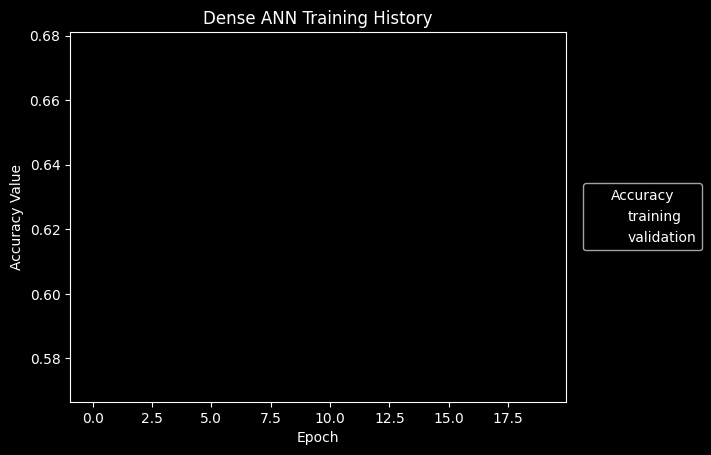

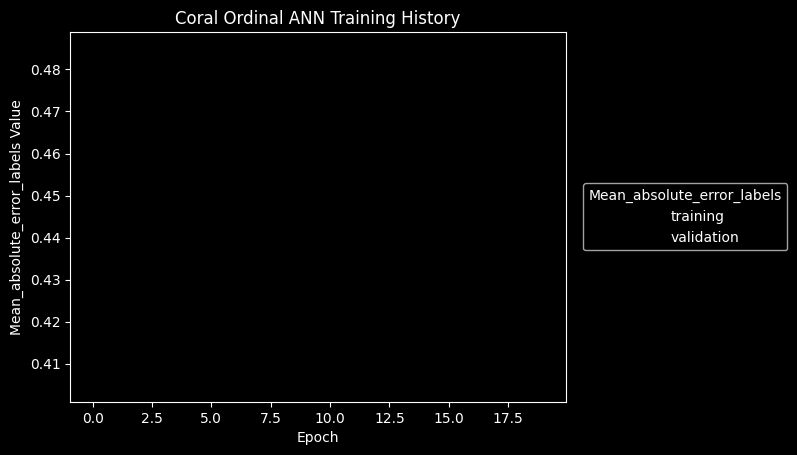

In [18]:
cmap = matplotlib.colormaps["Dark2"]


def plot_history_from_df_row(row):
    """Plot the history with the parameters from a row in a DataFrame"""
    plt.figure()
    plot_training_history(
        model=row["model"],
        history=row["history"],
        metric=row["metric"],
        training_options={"linestyle": "--", "color": cmap(row["i_color"])},
        validation_options={"color": cmap(row["i_color"])},
    )


models_df.apply(plot_history_from_df_row, axis=1)

# Conclusion
The applied ann do not provide better predictions than the conventional models from notebook 2.
It is noticeable that the training hardly provides any improvement over the different epochs,
as seen in the validation loss.